## Name: Ashish Bhagchandani
## GitHub: ashishbhagchandani
## USC ID: 4690271015
## Homework 6
### (Used one late day from six late days)

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix,roc_auc_score,accuracy_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

### 1 (a)

In [2]:
trainData = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20)
testData = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=20)
trainTestData = pd.DataFrame()
trainTestData = pd.concat([trainData, testData])

In [3]:
trainData

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59995   neg  153002     na         664    186      0      0      0      0   
59996   neg    2286     na  2130706538    224      0      0      0      0   
59997   neg     112      0  2130706432     18      0      0      0      0   
59998   neg   80292     na  2130706432    494      0      0      0      0   
59999   neg   40222     na         698    628      0      0      0      0   

      ag_002  ...   ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384   721044   469792   339156  157956   73224   
1          0  ...   421400  178064   293306   245416   133654   81140   97576   
2          0  ...   277378  159812   423992   409564   320746  158022   95128   
3          0  ...      240      46       58       44       10       0       0   
4          0  ...   622012  229790   405298   347188   286954  311560  433954   
...      ...  ...      ...     ...      ...      ...      ...     ...     ...   
59995      0  ...   998500  566884  1290398  1218244  1019768  717762  898642   
59996      0  ...    10578    6760    21126    68424      136       0       0   
59997      0  ...      792     386      452      144      146    2622       0   
59998      0  ...   699352  222654   347378   225724   194440  165070  802280   
59999      0  ...   440066  183200   344546   254068   225148  158304  170384   

       ee_009 ef_000 eg_000  
0           0      0      0  
1        1500      0      0  
2         514      0      0  
3           0      4     32  
4        1218      0      0  
...       ...    ...    ...  
59995   28588      0      0  
59996       0      0      0  
59997       0      0      0  
59998  388422      0      0  
59999     158      0      0  

[60000 rows x 171 columns]

### 1 (b)-i

In [4]:
trainData.replace('na', np.nan, inplace = True)
testData.replace('na', np.nan, inplace = True)

trainTestData.replace('na', np.nan, inplace = True)

In [5]:
XtrainData, YtrainData = trainData.iloc[:,1:], trainData.iloc[:,0]
XtestData, YtestData = testData.iloc[:,1:], testData.iloc[:,0]

XtrainTestData, YtrainTestData = trainTestData.iloc[:,1:], trainTestData.iloc[:,0]

XtrainDataFeatures = XtrainData.columns
XtestDataFeatures = XtestData.columns

XtrainTestDataFeatures = XtrainTestData.columns

In [6]:
print('NaN values in Xtrain data:',XtrainData.isna().sum().sum())
print('NaN values in Ytrain data:',YtrainData.isna().sum().sum())

print('NaN values in Xtest data:',XtestData.isna().sum().sum())
print('NaN values in Ytest data:',YtestData.isna().sum().sum())

print('NaN values in Xcombine data:',XtrainTestData.isna().sum().sum())
print('NaN values in Ycombine data:',YtrainTestData.isna().sum().sum())

NaN values in Xtrain data: 850015
NaN values in Ytrain data: 0
NaN values in Xtest data: 228680
NaN values in Ytest data: 0
NaN values in Xcombine data: 1078695
NaN values in Ycombine data: 0


In [7]:
imp = SimpleImputer(missing_values = np.nan, strategy='mean')
XtrainData = imp.fit_transform(XtrainData)
XtrainData = pd.DataFrame(XtrainData, columns = XtrainDataFeatures)

XtestData = imp.fit_transform(XtestData)
XtestData = pd.DataFrame(XtestData, columns = XtestDataFeatures)

XtrainTestData = imp.fit_transform(XtrainTestData)
XtrainTestData = pd.DataFrame(XtrainTestData, columns = XtrainTestDataFeatures)

In [8]:
print('NaN values in Xtrain data:',XtrainData.isna().sum().sum())
print('NaN values in Ytrain data:',YtrainData.isna().sum().sum())

print('NaN values in Xtest data:',XtestData.isna().sum().sum())
print('NaN values in Ytest data:',YtestData.isna().sum().sum())

print('NaN values in Xcombine data:',XtrainTestData.isna().sum().sum())
print('NaN values in Ycombine data:',YtrainTestData.isna().sum().sum())

NaN values in Xtrain data: 0
NaN values in Ytrain data: 0
NaN values in Xtest data: 0
NaN values in Ytest data: 0
NaN values in Xcombine data: 0
NaN values in Ycombine data: 0


### Techniques used to handle missing values
#### 1) Replacing with Mean/Median/Mode: Replace null values with the mean/median or mod
#### 2) Random Sample Imputation: Replace all the nan values with a random sample from the data frame
#### 3) Capturing NAN values with a new Feature: Add a new column in the dataset and replace all NaN values with 1
#### 4) End of Distribution:Replace NaN values with the 3rd standard deviation value
#### 5) Arbitrary Value Imputation: Replace the NaN value with an arbitrary value
#### 6) Frequent Category Imputation: Replace NaN values with the most Frequent label
#### 7) Treat nan value of categorical as a new category:  Replace all the NaN values with a new category
#### 8) Using KNN Imputer:  We create a KNN imputer model using sklearn and then we fit the model onto our data and predict the NaN values

### 1 (b)-ii

In [9]:
CV = []
feature = []
for cols in XtrainTestData:
    feature.append(cols)
    CV.append(XtrainTestData[cols].std()/XtrainTestData[cols].mean())
coeffVar = pd.DataFrame({'Feature':feature,'CV':CV})
coeffVar

Feature          CV
0    aa_000    4.328608
1    ab_000    2.178273
2    ac_000    2.167653
3    ad_000  206.721500
4    ae_000   22.293670
..      ...         ...
165  ee_007    4.885098
166  ee_008    3.335037
167  ee_009    5.753933
168  ef_000   47.919544
169  eg_000   45.650950

[170 rows x 2 columns]

### 1 (b)-iii

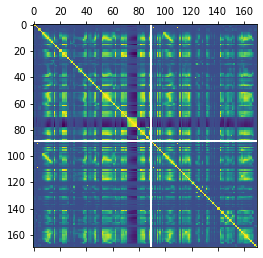

In [10]:
plt.matshow(XtrainTestData.corr())
plt.show()

### 1 (b)-iv

In [11]:
featureLimit = math.floor((170)**0.5)
coeffVar_sorted = coeffVar.sort_values(by=['CV'], ascending=False)
coeffVar_sorted = coeffVar_sorted[:featureLimit]
coeffVar_sorted

Feature          CV
91   cf_000  207.270274
109  co_000  206.876129
3    ad_000  206.721500
122  cs_009  192.522611
138  dj_000  122.128153
27   as_000  113.882755
136  dh_000  112.652450
134  df_000  111.369666
6    ag_000   91.460654
29   au_000   86.085638
19   ak_000   78.622988
51   az_009   77.999556
41   ay_009   77.461101

In [12]:
selectedFeature = XtrainTestData[coeffVar_sorted['Feature']]
selectedFeature['class'] = YtrainTestData.values
selectedFeature

cf_000         co_000         ad_000  cs_009  dj_000  as_000  \
0           2.000000     220.000000     280.000000     0.0     0.0     0.0   
1      150231.156793  150517.375485  150629.962105     0.0     0.0     0.0   
2           0.000000       0.000000     100.000000     0.0     0.0     0.0   
3           2.000000       2.000000      66.000000     0.0     0.0     0.0   
4           0.000000     202.000000     458.000000     0.0     0.0     0.0   
...              ...            ...            ...     ...     ...     ...   
75995       2.000000      42.000000     892.000000     0.0     0.0     0.0   
75996       2.000000       0.000000      46.000000     0.0     0.0     0.0   
75997       2.000000     378.000000    1518.000000     0.0     0.0     0.0   
75998       0.000000       0.000000      32.000000     0.0     0.0     0.0   
75999       0.000000       0.000000       4.000000     0.0     0.0     0.0   

       dh_000  df_000  ag_000  au_000  ak_000  az_009  ay_009 class  
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0   neg  
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0   neg  
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0   neg  
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0   neg  
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0   neg  
...       ...     ...     ...     ...     ...     ...     ...   ...  
75995     0.0     0.0     0.0     0.0     0.0     0.0     0.0   neg  
75996     0.0     0.0     0.0     0.0     0.0     0.0     0.0   neg  
75997     0.0     0.0     0.0     0.0     0.0     0.0     0.0   neg  
75998     0.0     0.0     0.0     0.0     0.0     0.0     0.0   neg  
75999     0.0     0.0     0.0     0.0     0.0     0.0     0.0   neg  

[76000 rows x 14 columns]

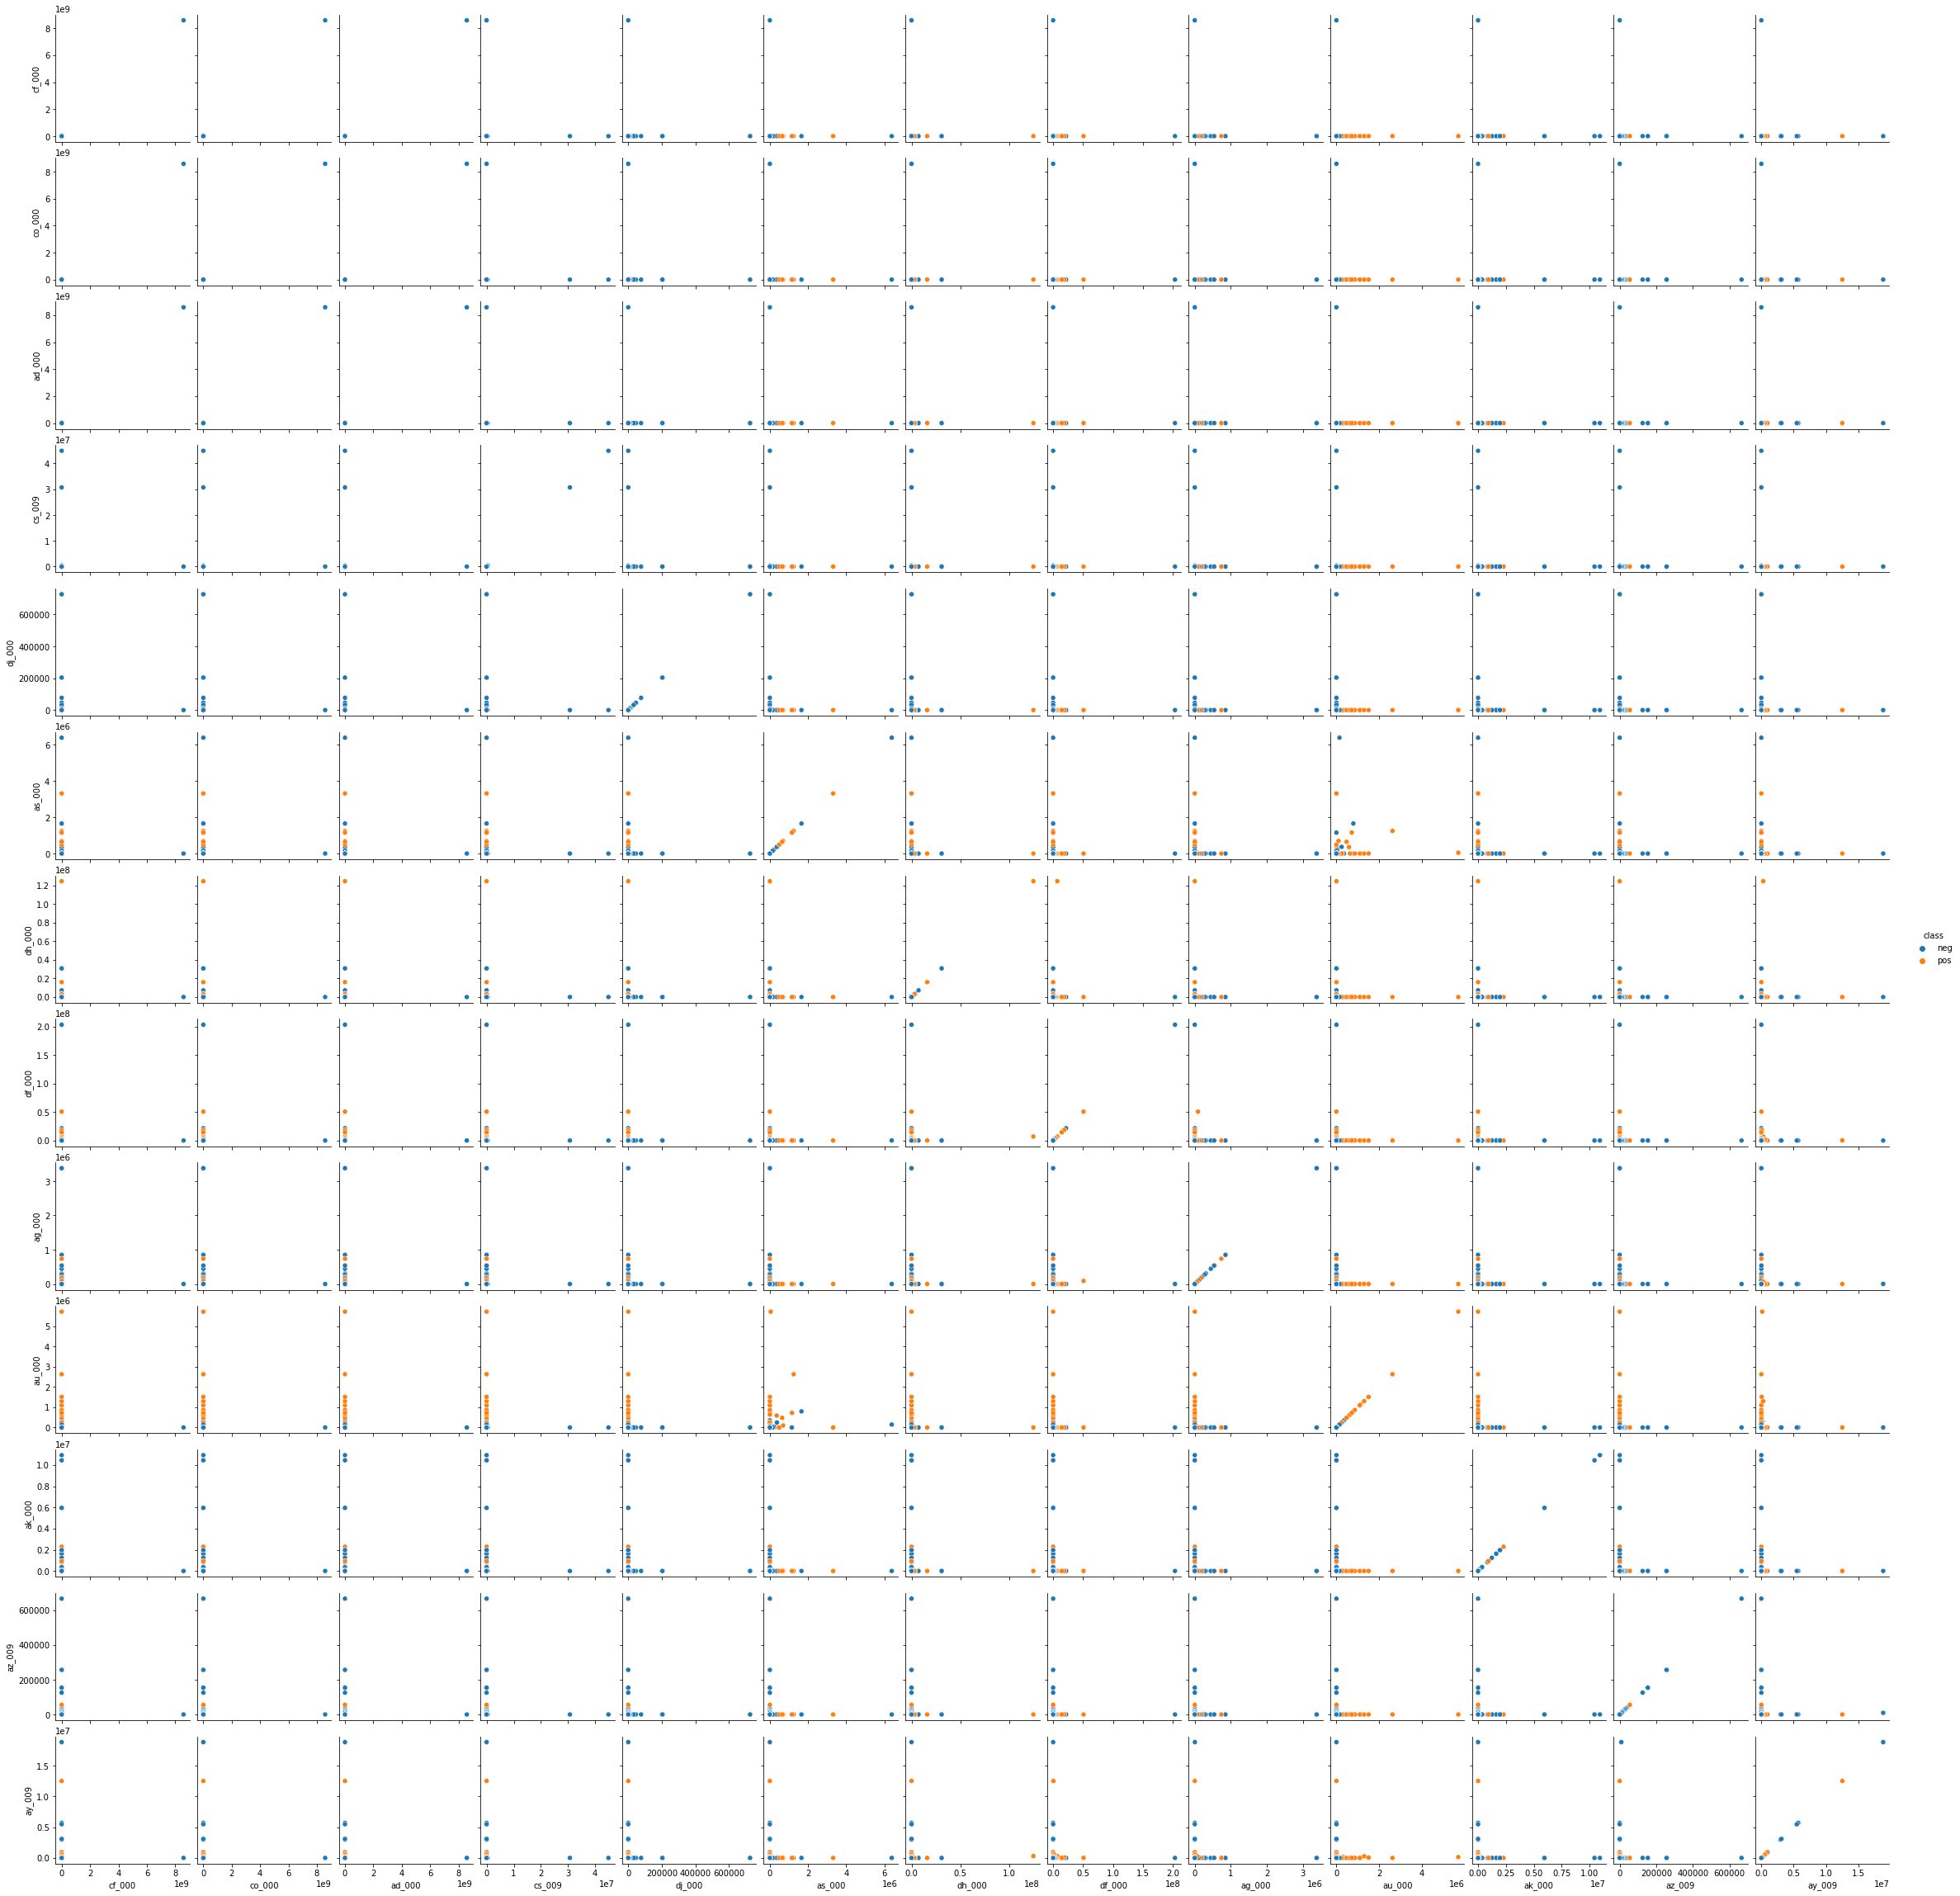

In [13]:
sns.pairplot(selectedFeature,hue='class', diag_kind = None)

<AxesSubplot:>

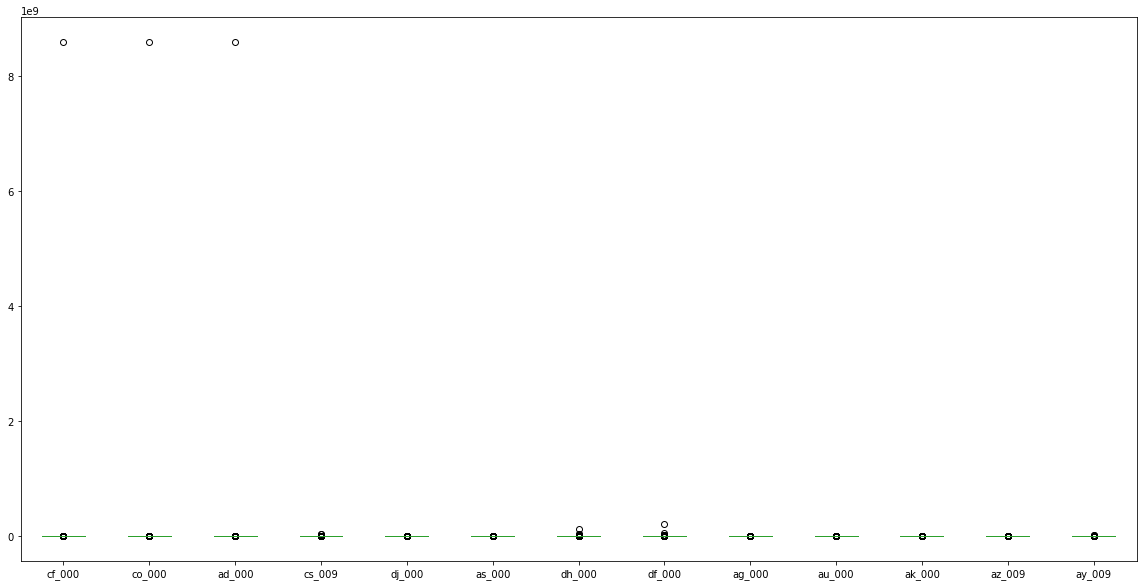

In [14]:
selectedFeature.plot(kind='box',figsize=(20, 10))

#### Based on scatter plot we cannot draw any conclusions about the significance, as they show us relation between two features. But we can see that some features are inter-corelated with other features.

### 1 (b)-v

In [15]:
YtrainData.value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [16]:
YtestData.value_counts()

neg    15625
pos      375
Name: class, dtype: int64

### 1 (c)

In [17]:
model = RandomForestClassifier(oob_score=True)
YtrainData.replace(('pos', 'neg'), (1, 0), inplace=True)
YtestData.replace(('pos', 'neg'), (1, 0), inplace=True)

In [18]:
model.fit(XtrainData, YtrainData)

RandomForestClassifier(oob_score=True)

Train data
Confusion matrix
[[59000     0]
 [    1   999]]
Misclassification: 1.6666666666666667e-05


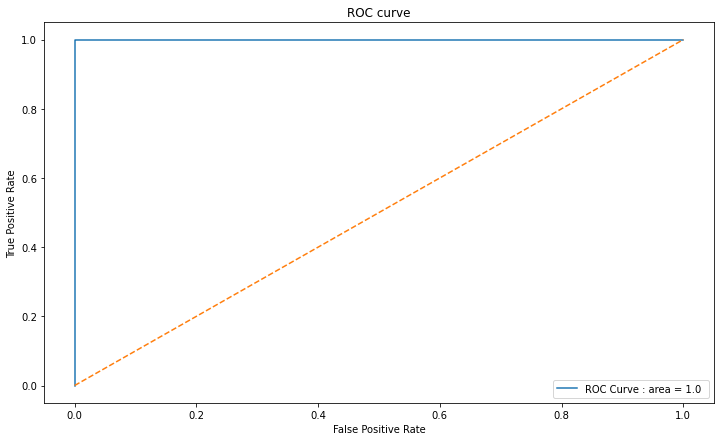

AUC: 1.0
Train error: 1.6666666666666667e-05


In [19]:
print('Train data')
prediction = model.predict(XtrainData)
yTrainProb = model.predict_proba(XtrainData)[:,1]
confusionMatrix= confusion_matrix(YtrainData,prediction)
print('Confusion matrix')
print(confusionMatrix)
tn, fp, fn, tp = confusionMatrix.ravel()
misclasstrain = (fp+fn)/(tn+fp+fn+tp)
print('Misclassification:', misclasstrain)

fpr, tpr, _ = roc_curve(YtrainData, yTrainProb)
fig, axes = plt.subplots(figsize=(12, 7))
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label="ROC Curve : area = {} ".format(roc_auc))
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve")
plt.show()
auctrain = roc_auc_score(YtrainData, yTrainProb)
print('AUC:', auctrain)
print("Train error:", (fp+fn)/(tn+fp+fn+tp))

Test data
Confusion matrix
[[15608    17]
 [  103   272]]
Misclassification: 0.0075


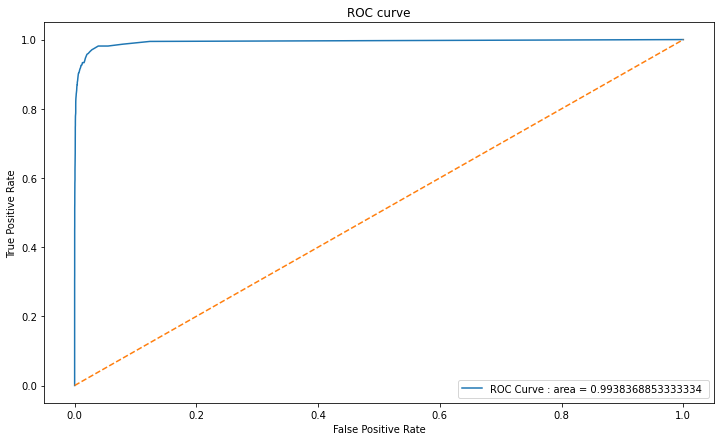

AUC: 0.9938368853333334


In [20]:
print('Test data')
prediction = model.predict(XtestData)
yTestProb = model.predict_proba(XtestData)[:,1]
confusionMatrix= confusion_matrix(YtestData,prediction)
print('Confusion matrix')
print(confusionMatrix)
tn, fp, fn, tp = confusionMatrix.ravel()
misclasstest = (fp+fn)/(tn+fp+fn+tp)
print('Misclassification:', misclasstest)

fpr, tpr, _ = roc_curve(YtestData, yTestProb)
fig, axes = plt.subplots(figsize=(12, 7))
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label="ROC Curve : area = {} ".format(roc_auc))
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve")
plt.show()
auctest = roc_auc_score(YtestData, yTestProb)
print('AUC:', auctest)

In [21]:
ofbe = 1 - model.oob_score_
print("Out of Bag error : ", ofbe )
print("Test error:", (fp+fn)/(tn+fp+fn+tp))

Out of Bag error :  0.005866666666666687
Test error: 0.0075


### 1 (d)

### Class imbalance is addressed in random forests by,
### 1) With the help of feature selction
### 2) Minor oversampling
### 3) Undersampling
### 4) To improve performance we can also use balanced random forest

In [22]:
smote = SMOTE()
XtrainDataSMOTE, YtrainDataSMOTE = smote.fit_resample(XtrainData, YtrainData)
model = RandomForestClassifier(oob_score=True)
model.fit(XtrainDataSMOTE, YtrainDataSMOTE)

RandomForestClassifier(oob_score=True)

Train data
Confusion matrix
[[59000     0]
 [    0 59000]]
Misclassification: 0.0


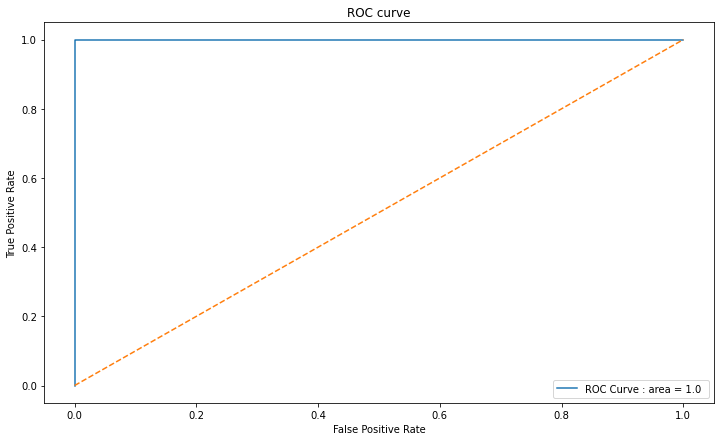

AUC: 1.0
Train error: 0.0


In [23]:
print('Train data')
prediction = model.predict(XtrainDataSMOTE)
yTrainProbSMOTE = model.predict_proba(XtrainDataSMOTE)[:,1]
confusionMatrix= confusion_matrix(YtrainDataSMOTE,prediction)
print('Confusion matrix')
print(confusionMatrix)
tn, fp, fn, tp = confusionMatrix.ravel()
misclasstrainSMOTE = (fp+fn)/(tn+fp+fn+tp)
print('Misclassification:', misclasstrainSMOTE)

fpr, tpr, _ = roc_curve(YtrainDataSMOTE, yTrainProbSMOTE)
fig, axes = plt.subplots(figsize=(12, 7))
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label="ROC Curve : area = {} ".format(roc_auc))
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve")
plt.show()
auctrainSMOTE = roc_auc_score(YtrainData, yTrainProb)
print('AUC:', auctrainSMOTE)
print("Train error:", (fp+fn)/(tn+fp+fn+tp))

Test data
Confusion matrix
[[15479   146]
 [   61   314]]
Misclassification: 0.0129375


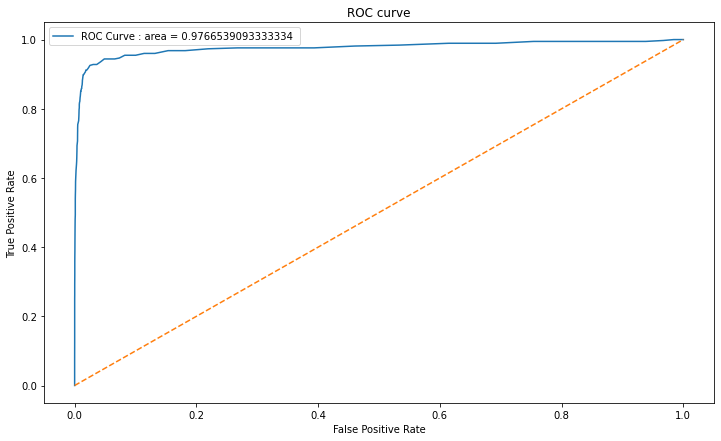

AUC: 0.9766539093333334
Test error: 0.0129375
Out of Bag error :  0.0030508474576270705


In [24]:
print('Test data')
prediction = model.predict(XtestData)
yTestProb = model.predict_proba(XtestData)[:,1]
confusionMatrix= confusion_matrix(YtestData,prediction)
print('Confusion matrix')
print(confusionMatrix)
tn, fp, fn, tp = confusionMatrix.ravel()
misclasstestSMOTE = (fp+fn)/(tn+fp+fn+tp)
print('Misclassification:', misclasstestSMOTE)

fpr, tpr, _ = roc_curve(YtestData, yTestProb)
fig, axes = plt.subplots(figsize=(12, 7))
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label="ROC Curve : area = {} ".format(roc_auc))
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve")
plt.show()
auctestSMOTE = roc_auc_score(YtestData, yTestProb)
print('AUC:', auctestSMOTE)
print("Test error:", (fp+fn)/(tn+fp+fn+tp))
ofbe = 1 - model.oob_score_
print("Out of Bag error : ", ofbe )

In [25]:
compateModel = pd.DataFrame({"Type":['trainAUC','testAUC','trainMiscl','testMiscl',
                                     'trainAUCSMOTE','testAUCSMOTE','trainMisclSMOTE','testMisclSMOTE'],
                           "Score":[auctrain,auctest,misclasstrain,misclasstest,
                                    auctrainSMOTE, auctestSMOTE, misclasstrainSMOTE, misclasstestSMOTE]})
compateModel

Type     Score
0         trainAUC  1.000000
1          testAUC  0.993837
2       trainMiscl  0.000017
3        testMiscl  0.007500
4    trainAUCSMOTE  1.000000
5     testAUCSMOTE  0.976654
6  trainMisclSMOTE  0.000000
7   testMisclSMOTE  0.012937

#### 1) For train dataset AUC score for both 1(c) and 1(d) model is 1
#### 2) For test dataset AUC score for 1(d) model is slight less than 1(c) model
#### 3) For train dataset Misclassification score for both 1(c) and 1(d) model is 0
#### 4) For test dataset Misclassification score for 1(d) model is more than 1(c) model

### 1 (e)

In [26]:
model = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'logloss',reg_lambda = 0, n_jobs=-1) 
params = {'reg_alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
model = GridSearchCV(model, params, cv=5, scoring ='f1')
model.fit(XtrainData, YtrainData)
bestAlpha = model.best_params_['reg_alpha']
bestScore = model.best_score_
print("Best alpha value: ", bestAlpha)
print("Best score value: ", bestScore)

Best alpha value:  0.01
Best score value:  0.8218713874734732


In [27]:
model = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'logloss',reg_alpha = bestAlpha ,reg_lambda = 0,  n_jobs=-1) 
model.fit(XtrainData, YtrainData)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.01, reg_lambda=0, ...)

Train data
Confusion matrix
[[59000     0]
 [    1   999]]
Misclassification: 1.6666666666666667e-05


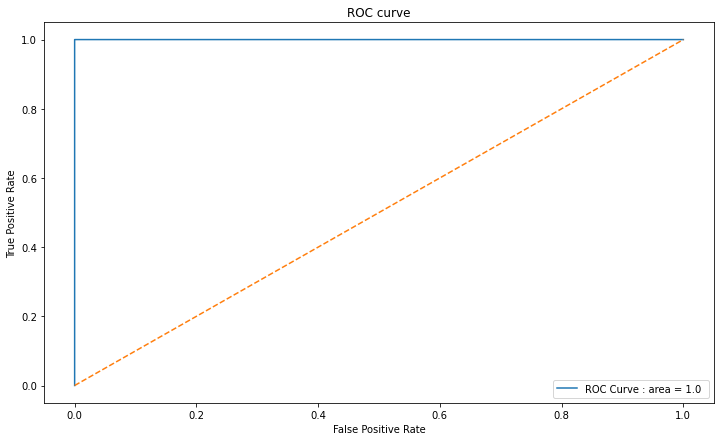

AUC: 1.0
Train Error :  1.666666666666483e-05


In [28]:
print('Train data')
prediction = model.predict(XtrainData)
yTrainProbXG = model.predict_proba(XtrainData)[:,1]
confusionMatrix= confusion_matrix(YtrainData,prediction)
print('Confusion matrix')
print(confusionMatrix)
tn, fp, fn, tp = confusionMatrix.ravel()
misclasstrainXG = (fp+fn)/(tn+fp+fn+tp)
print('Misclassification:', misclasstrainXG)

fpr, tpr, _ = roc_curve(YtrainData, yTrainProbXG)
fig, axes = plt.subplots(figsize=(12, 7))
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label="ROC Curve : area = {} ".format(roc_auc))
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve")
plt.show()
auctrainXG = roc_auc_score(YtrainData, yTrainProbXG)
print('AUC:', auctrainXG)
trainError = 1 - ((tn + tp)/(tn+fp+fn+tp))
print("Train Error : ", trainError)

Test data
Confusion matrix
[[15605    20]
 [   83   292]]
Misclassification: 0.0064375


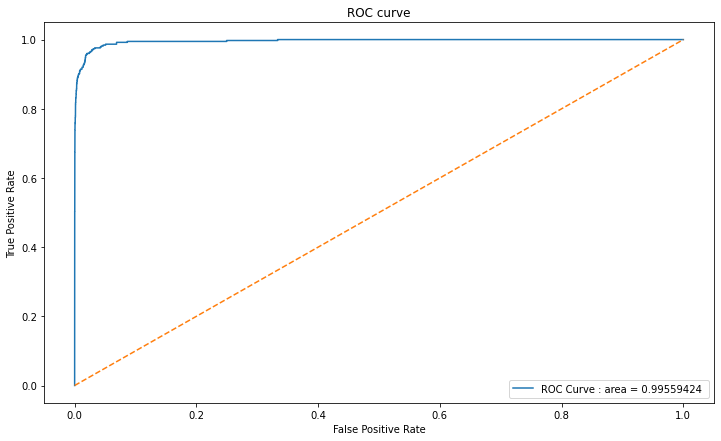

AUC: 0.99559424
Test Error :  0.006437499999999985


In [29]:
print('Test data')
prediction = model.predict(XtestData)
yTestProbXG = model.predict_proba(XtestData)[:,1]
confusionMatrix= confusion_matrix(YtestData,prediction)
print('Confusion matrix')
print(confusionMatrix)
tn, fp, fn, tp = confusionMatrix.ravel()
misclasstestXG = (fp+fn)/(tn+fp+fn+tp)
print('Misclassification:', misclasstestXG)

fpr, tpr, _ = roc_curve(YtestData, yTestProbXG)
fig, axes = plt.subplots(figsize=(12, 7))
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label="ROC Curve : area = {} ".format(roc_auc))
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve")
plt.show()
auctestXG = roc_auc_score(YtestData, yTestProbXG)
print('AUC:', auctestXG)
testError = 1 - ((tn + tp)/(tn+fp+fn+tp))
print("Test Error : ", testError)

### 1 (f)

In [30]:
model = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'logloss',reg_lambda = 0, n_jobs=-1) 
createPipeline = make_pipeline(SMOTE(random_state=11), model)

param_grid = {
    "xgbclassifier__reg_alpha":[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "xgbclassifier__objective": ["binary:logistic"],
    "xgbclassifier__eval_metric": ["logloss"],
    "xgbclassifier__reg_lambda":[0],
    "xgbclassifier__n_jobs":[-1]}
        
        
gridCVmodel = GridSearchCV(createPipeline, param_grid, cv=5, scoring ='f1')
gridCVmodel.fit(XtrainData, YtrainData)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=11)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='logloss',
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                   

In [31]:
print("Best alpha value: ", gridCVmodel.best_params_['xgbclassifier__reg_alpha'])
print("Best score value: ", gridCVmodel.best_score_)

Best alpha value:  1
Best score value:  0.818514332003484


In [32]:
model = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'logloss',reg_alpha = gridCVmodel.best_params_['xgbclassifier__reg_alpha'] ,reg_lambda = 0,  n_jobs=-1) 
model.fit(XtrainData, YtrainData)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1, reg_lambda=0, ...)

Train data
Confusion matrix
[[59000     0]
 [    1   999]]
Misclassification: 1.6666666666666667e-05


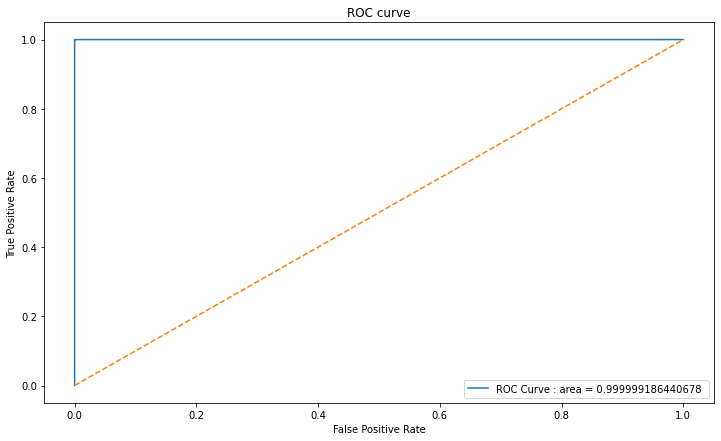

AUC: 0.999999186440678
Train Error :  1.666666666666483e-05


In [33]:
print('Train data')
prediction = model.predict(XtrainData)
yTrainProbXGSMOTE = model.predict_proba(XtrainData)[:,1]
confusionMatrix= confusion_matrix(YtrainData,prediction)
print('Confusion matrix')
print(confusionMatrix)
tn, fp, fn, tp = confusionMatrix.ravel()
misclasstrainXGSMOTE = (fp+fn)/(tn+fp+fn+tp)
print('Misclassification:', misclasstrainXGSMOTE)

fpr, tpr, _ = roc_curve(YtrainData, yTrainProbXGSMOTE)
fig, axes = plt.subplots(figsize=(12, 7))
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label="ROC Curve : area = {} ".format(roc_auc))
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve")
plt.show()
auctrainXGSMOTE = roc_auc_score(YtrainData, yTrainProbXGSMOTE)
print('AUC:', auctrainXGSMOTE)
trainError = 1 - ((tn + tp)/(tn+fp+fn+tp))
print("Train Error : ", trainError)

Test data
Confusion matrix
[[15615    10]
 [   80   295]]
Misclassification: 0.005625


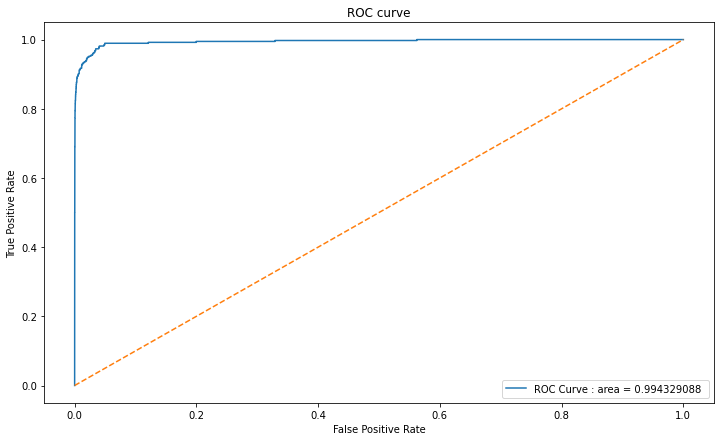

AUC: 0.994329088
Test Error :  0.005624999999999991


In [34]:
print('Test data')
prediction = model.predict(XtestData)
yTestProbXGSMOTE = model.predict_proba(XtestData)[:,1]
confusionMatrix= confusion_matrix(YtestData,prediction)
print('Confusion matrix')
print(confusionMatrix)
tn, fp, fn, tp = confusionMatrix.ravel()
misclasstestXGSMOTE = (fp+fn)/(tn+fp+fn+tp)
print('Misclassification:', misclasstestXGSMOTE)

fpr, tpr, _ = roc_curve(YtestData, yTestProbXGSMOTE)
fig, axes = plt.subplots(figsize=(12, 7))
roc_auc = auc(fpr, tpr)
axes.plot(fpr, tpr, label="ROC Curve : area = {} ".format(roc_auc))
axes.plot([0, 1], [0, 1], "--")
axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
axes.legend()
axes.set_title("ROC curve")
plt.show()
auctestXGSMOTE = roc_auc_score(YtestData, yTestProbXGSMOTE)
print('AUC:', auctestXGSMOTE)
testError = 1 - ((tn + tp)/(tn+fp+fn+tp))
print("Test Error : ", testError)

#### With the help of test confusion matrix and test error we can see that XG Boost works slight better with SMOTE

### 2. ISLR 6.6.3

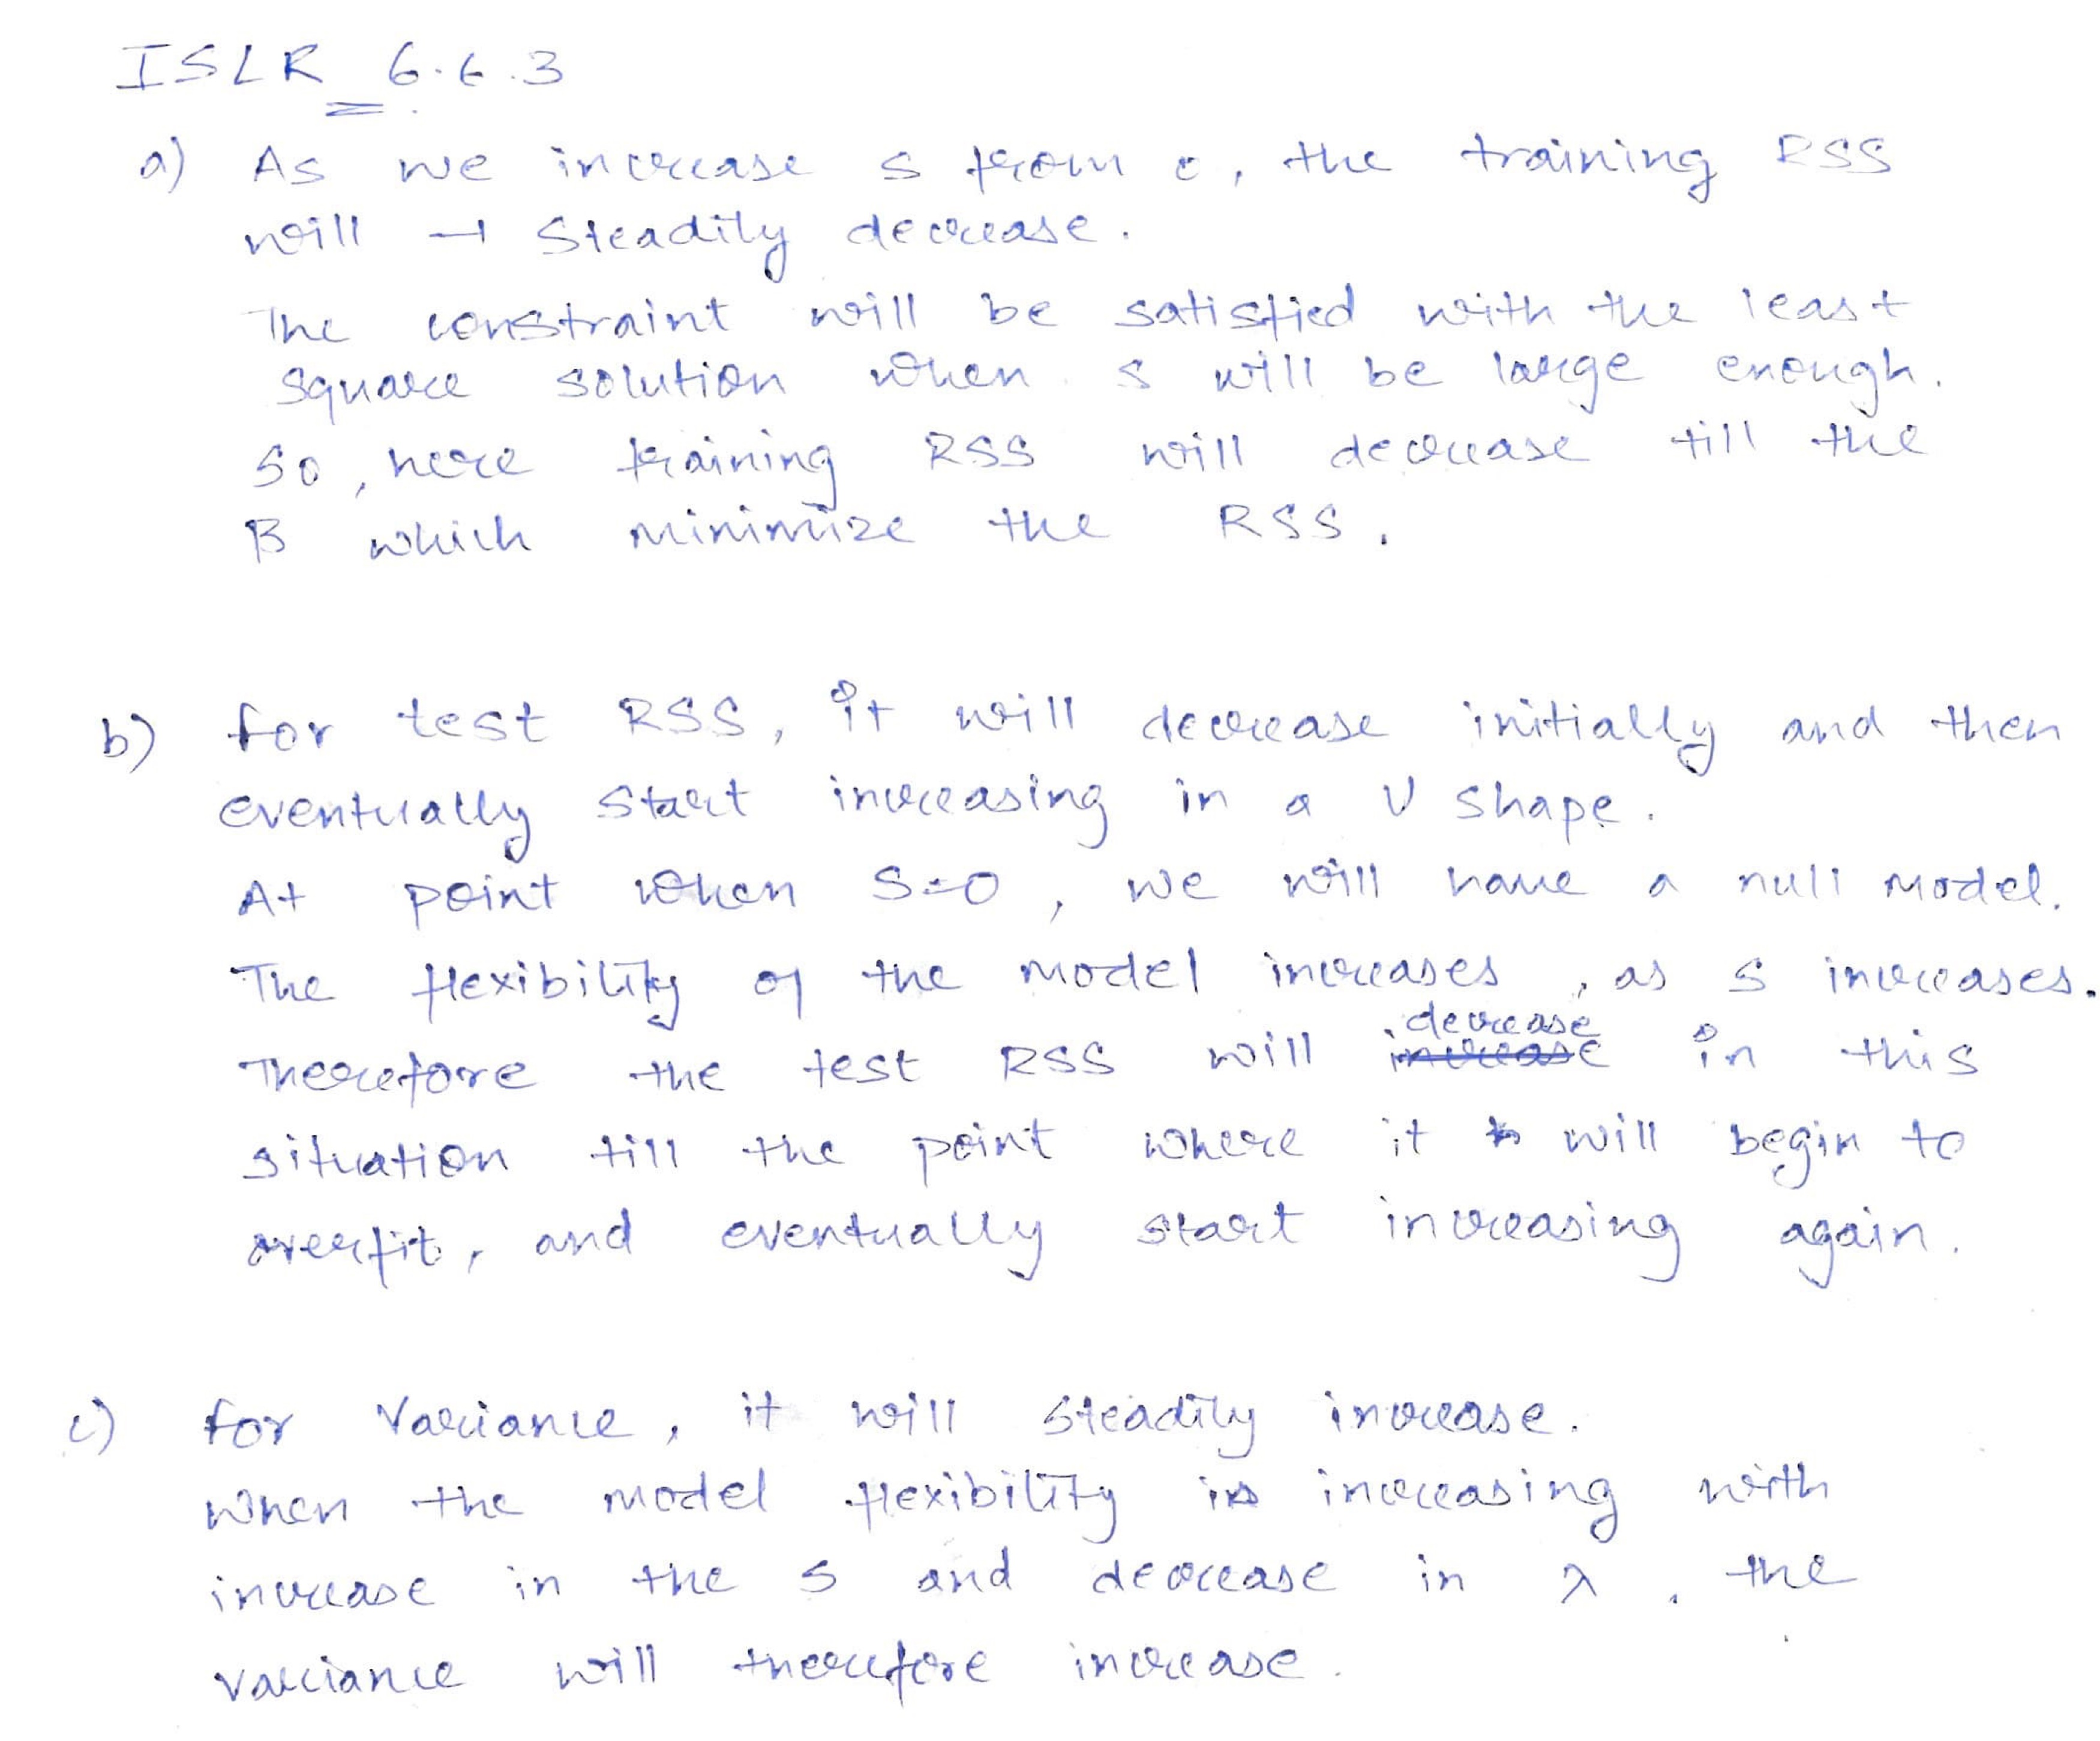

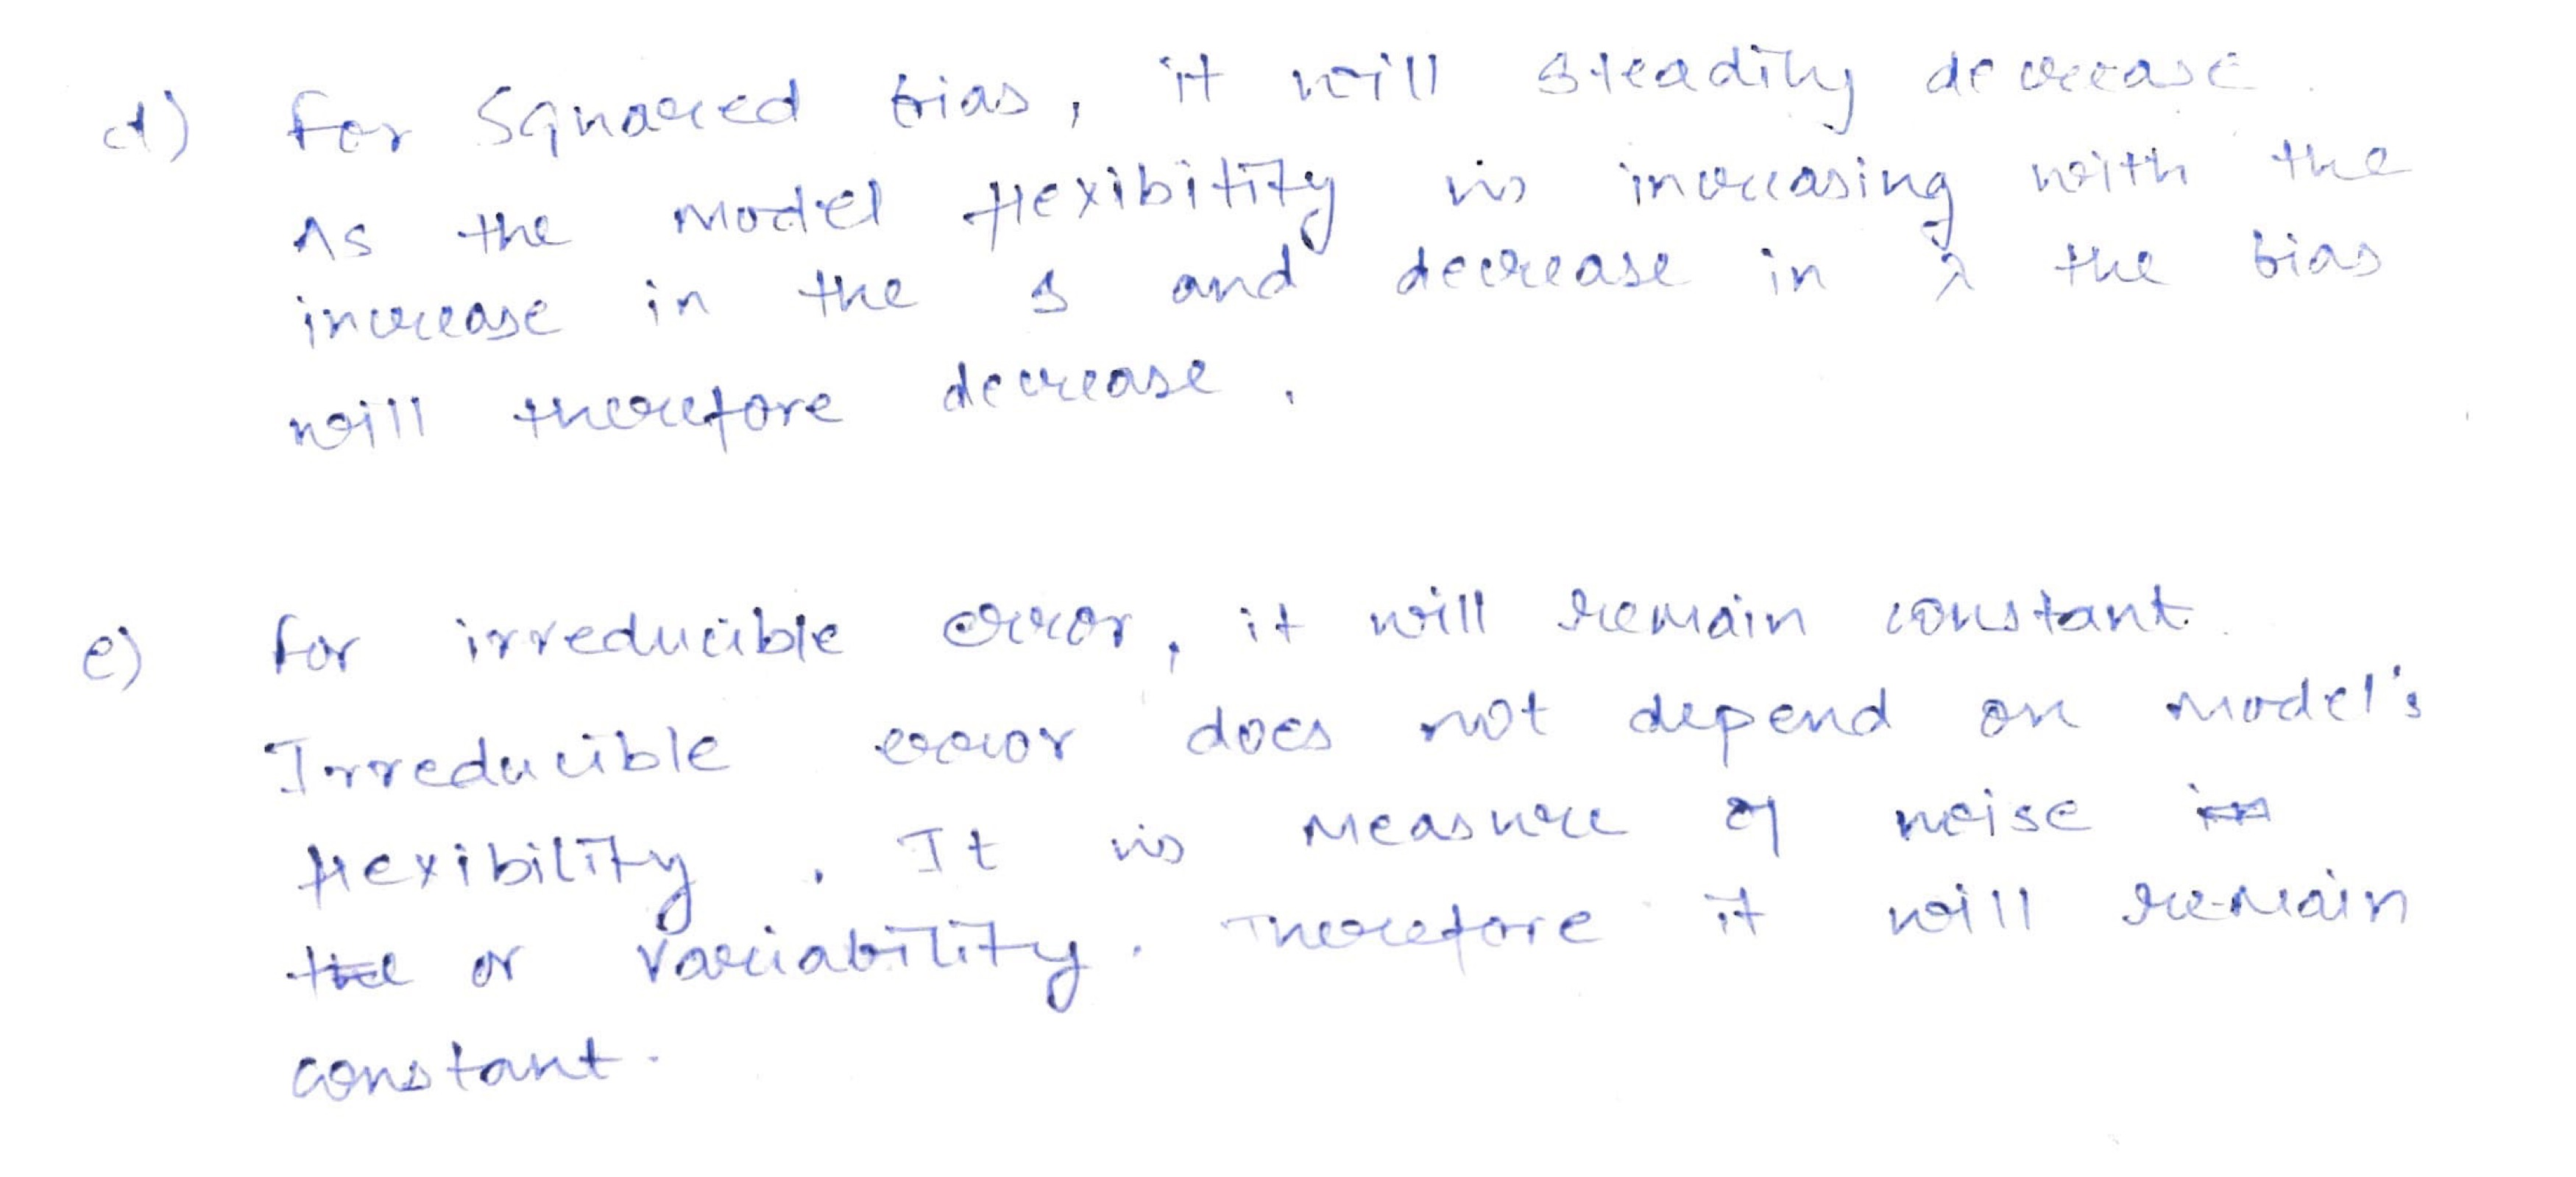

### 3. ISLR, 6.6.5

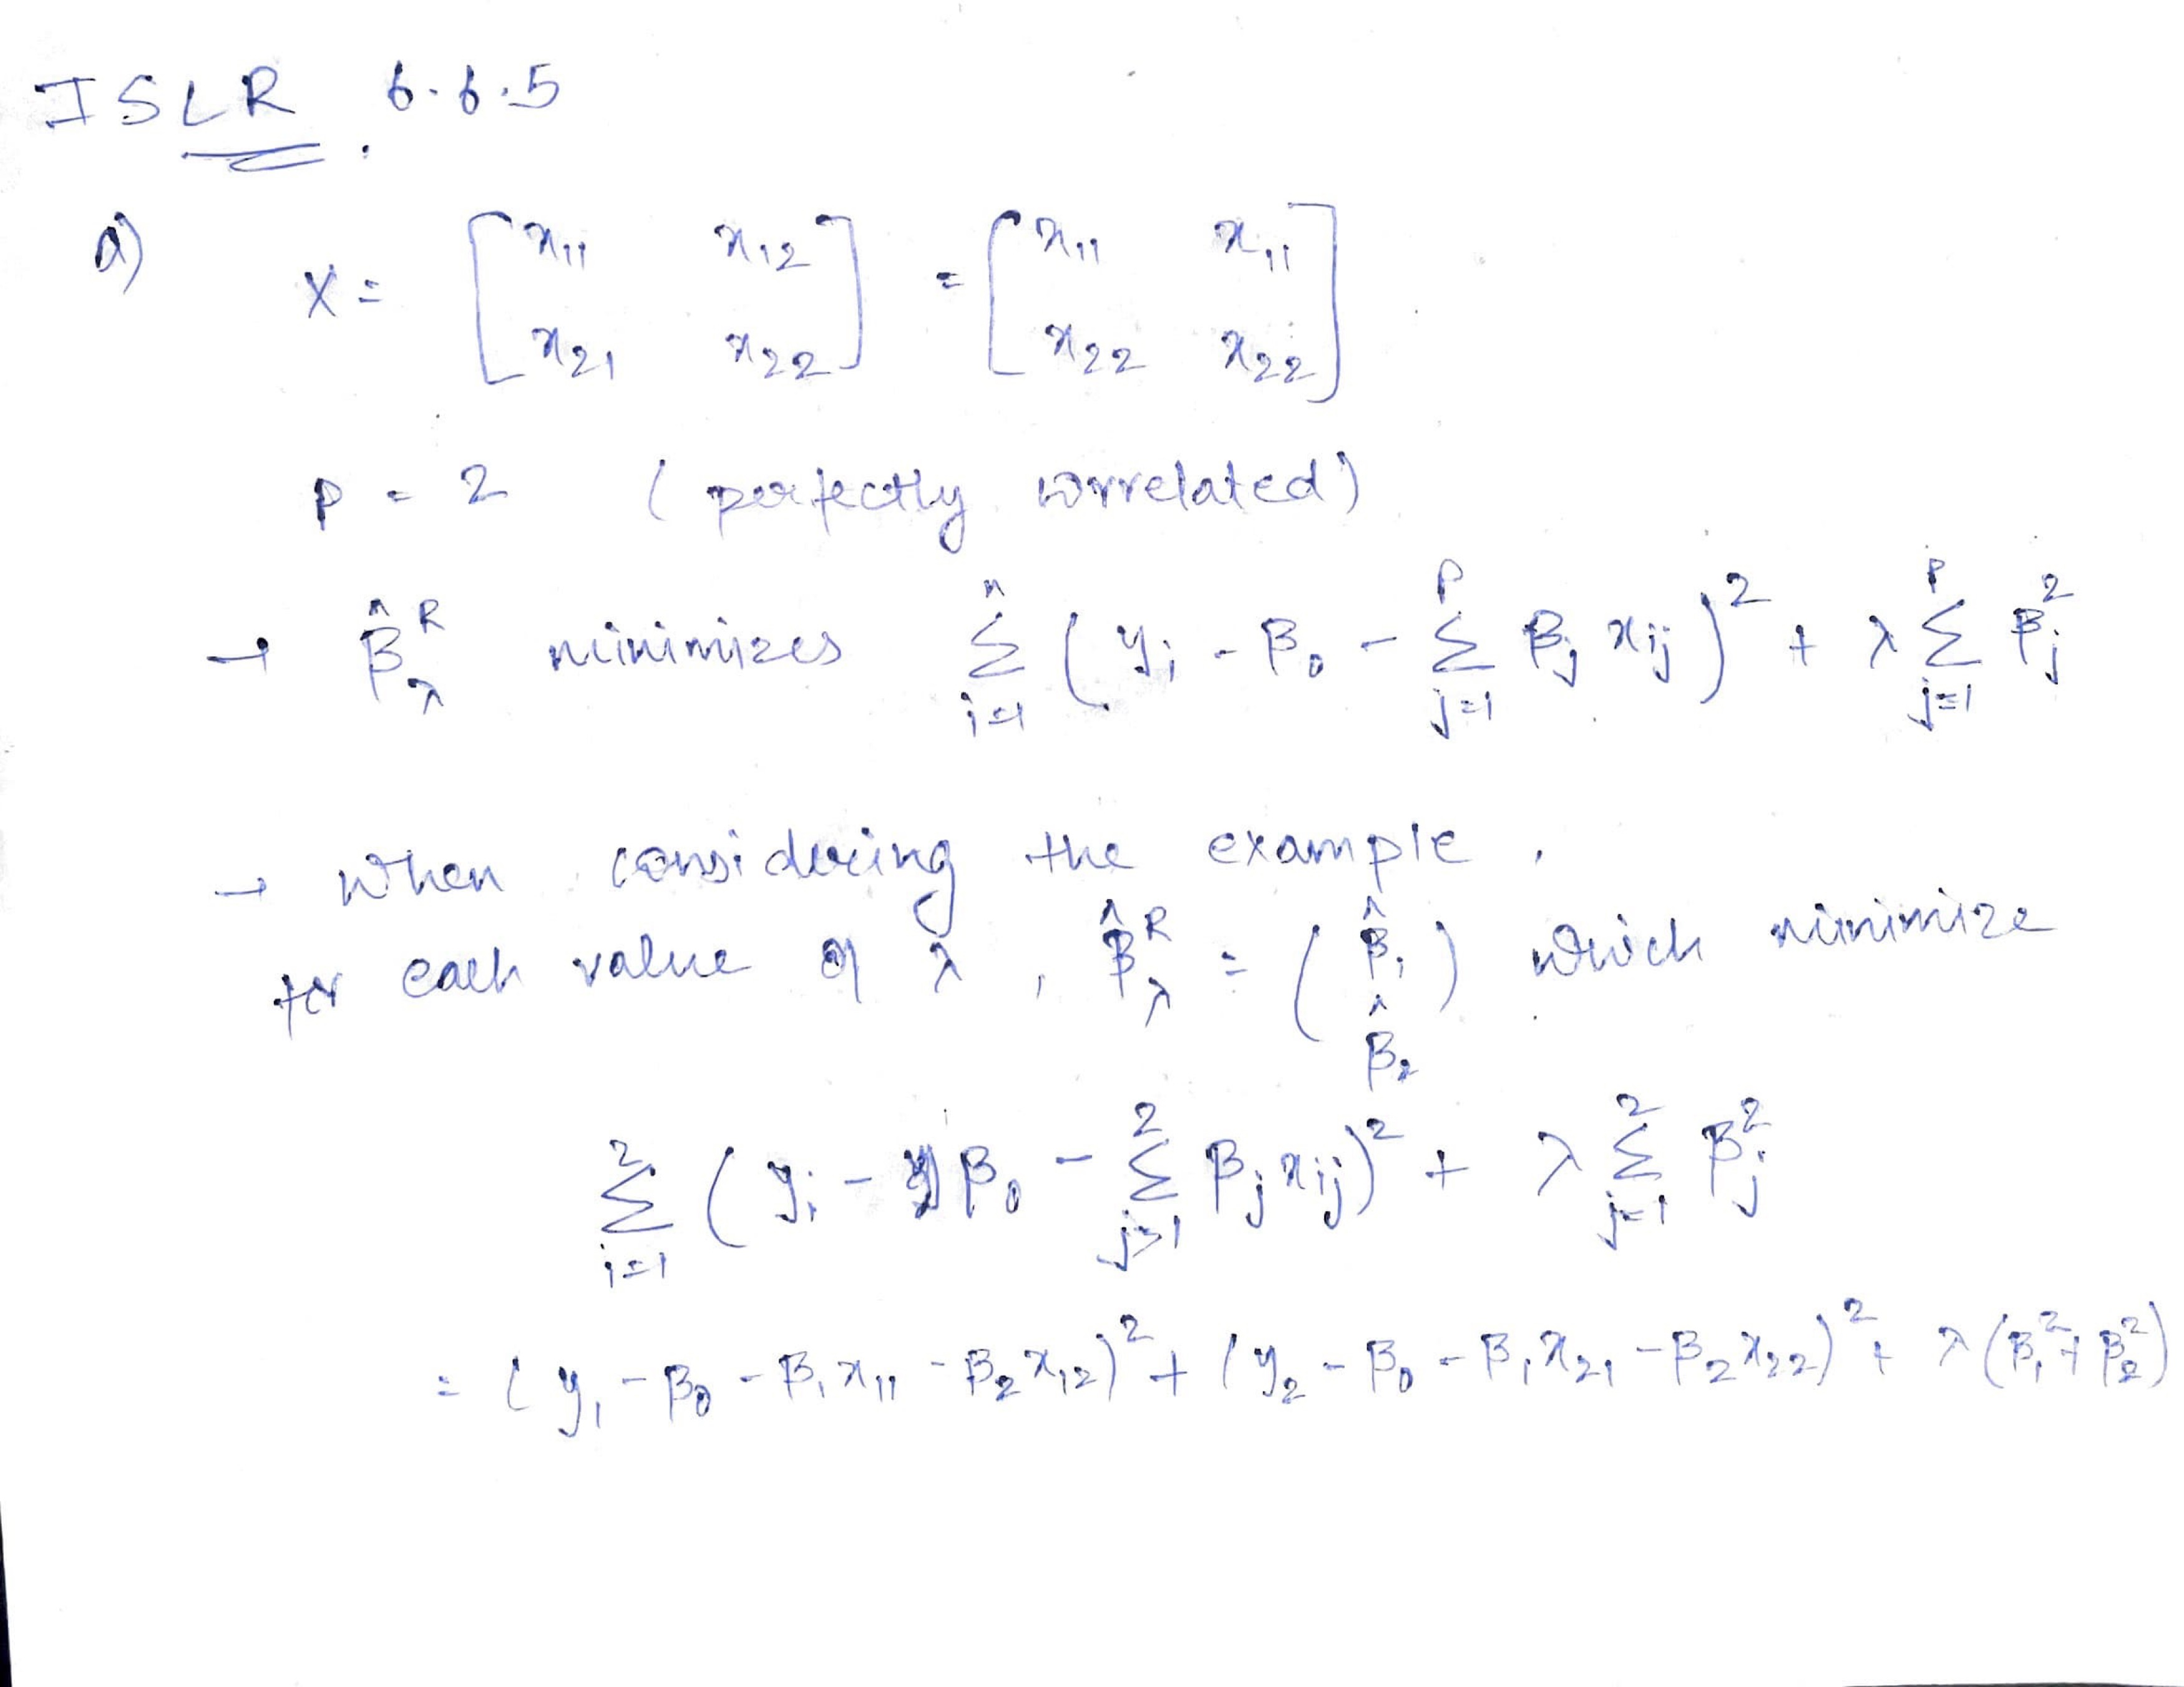

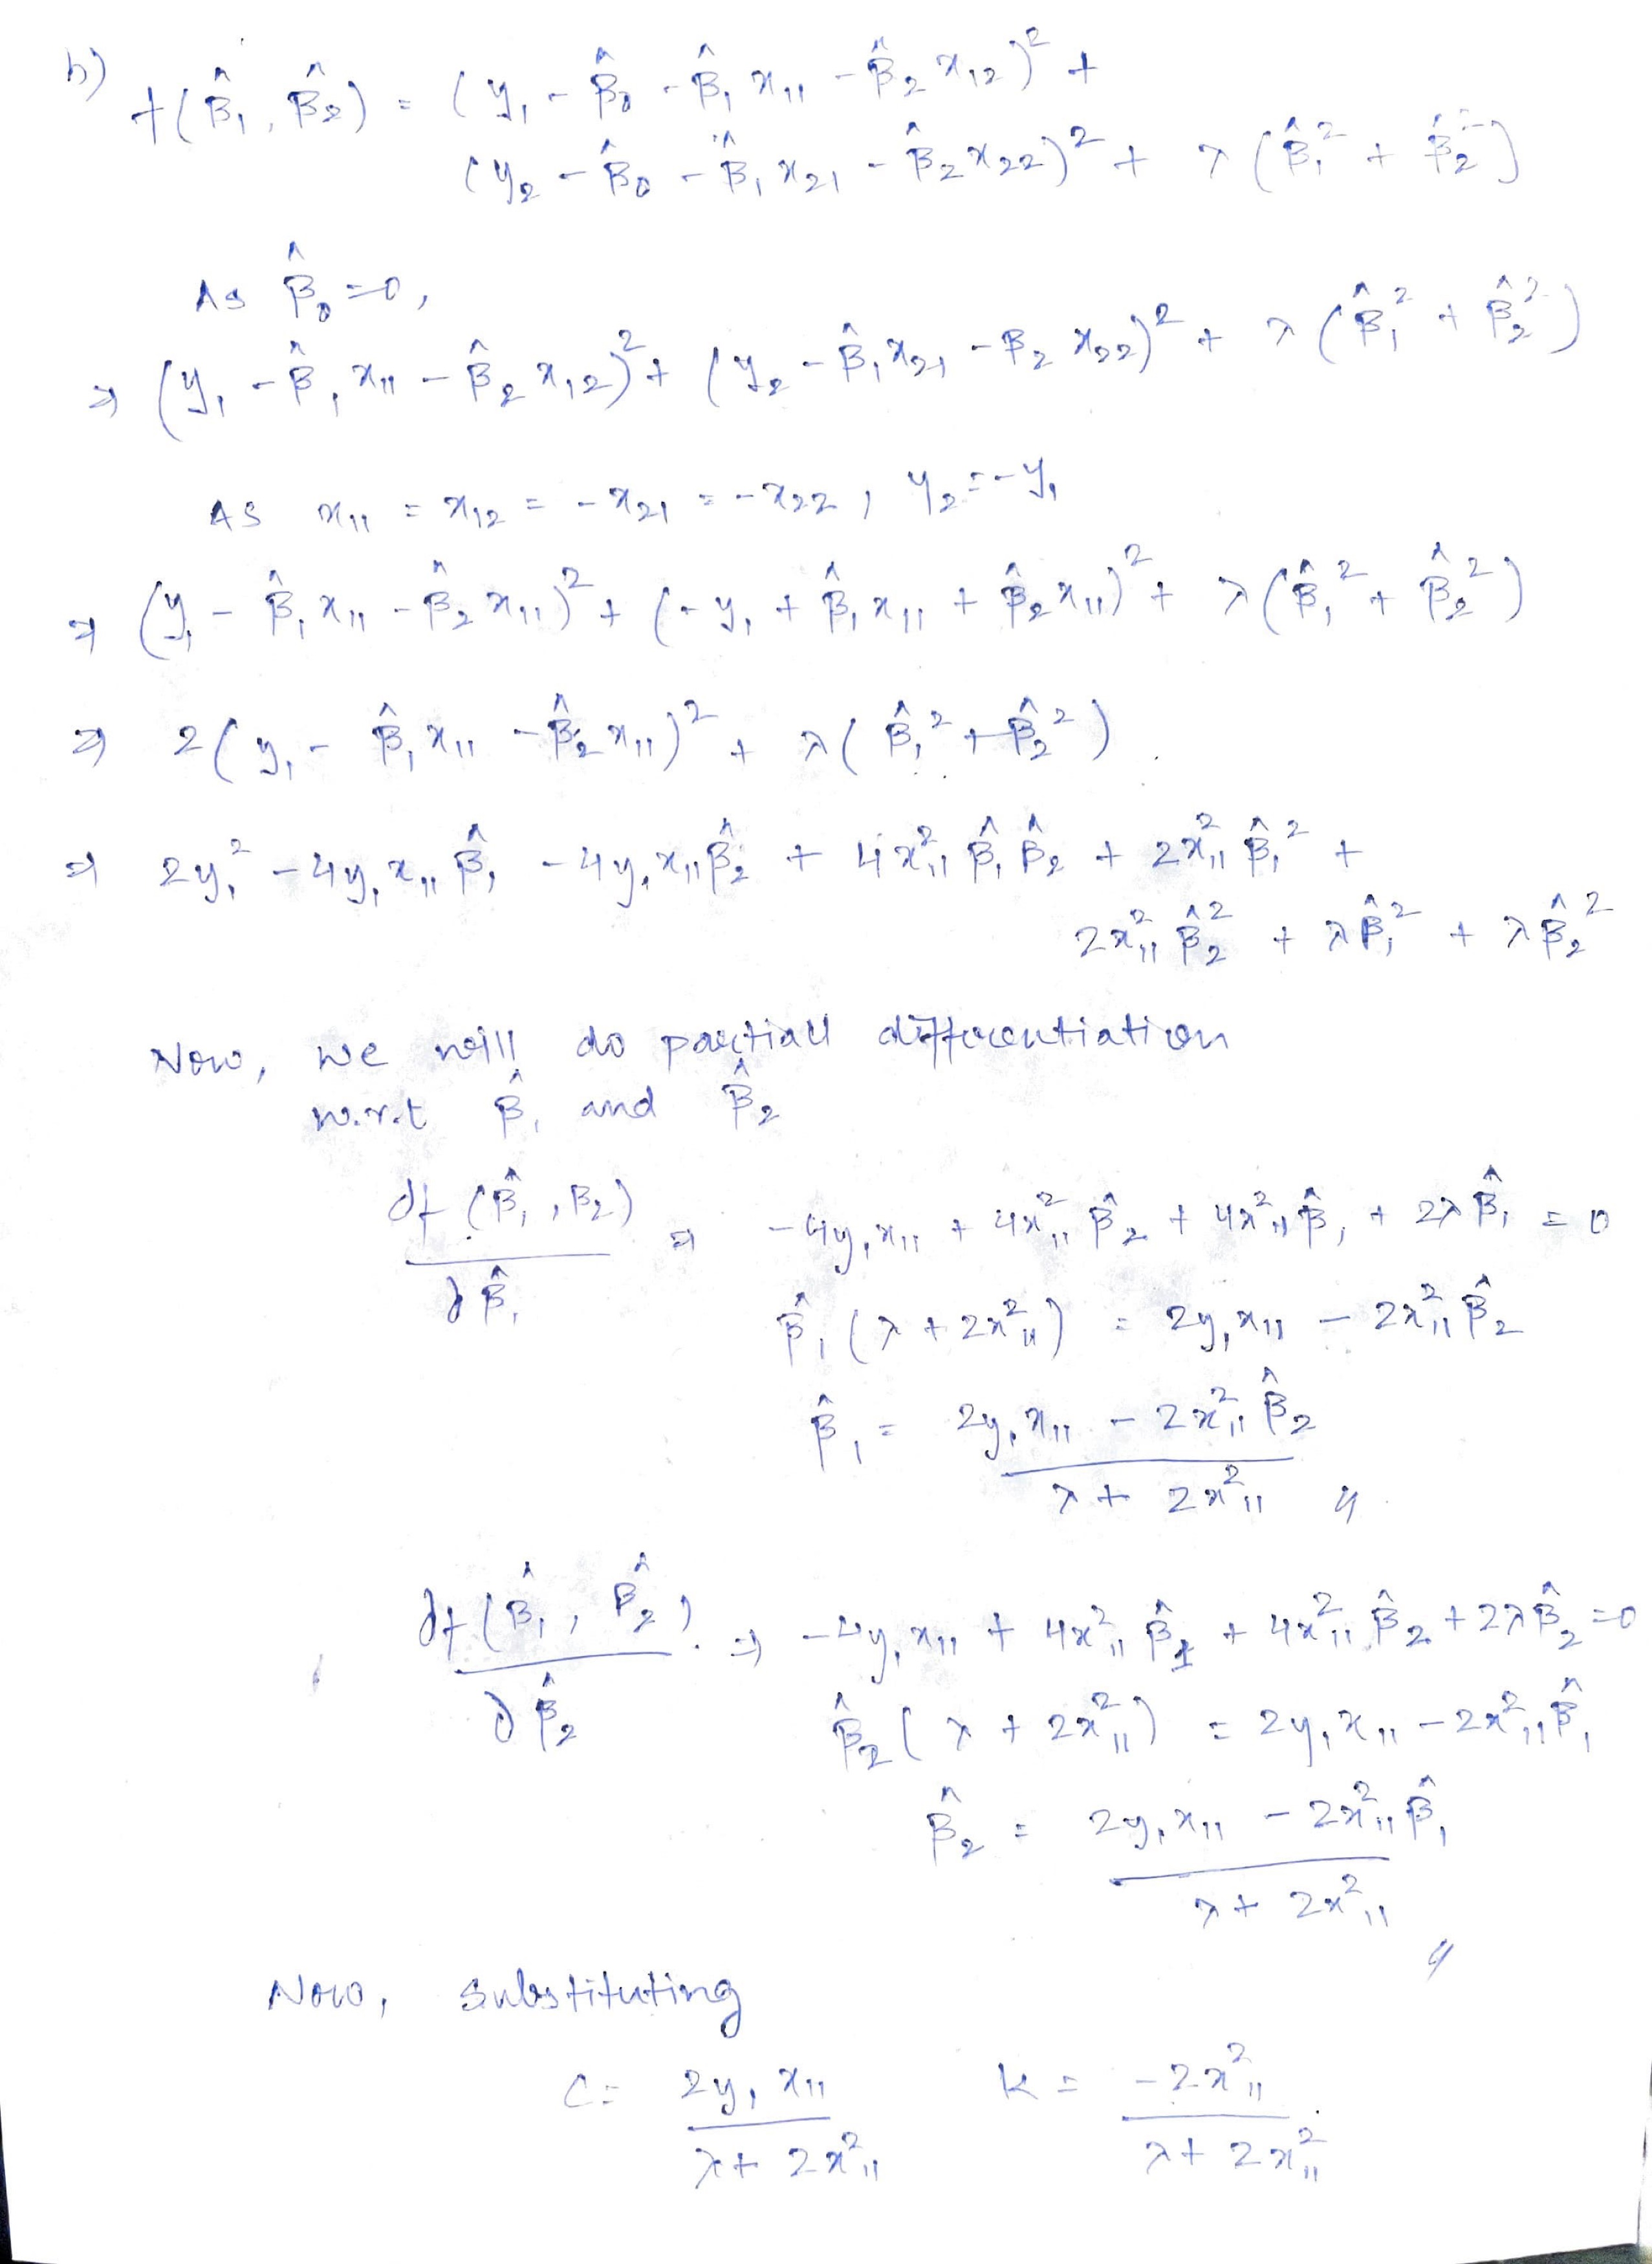

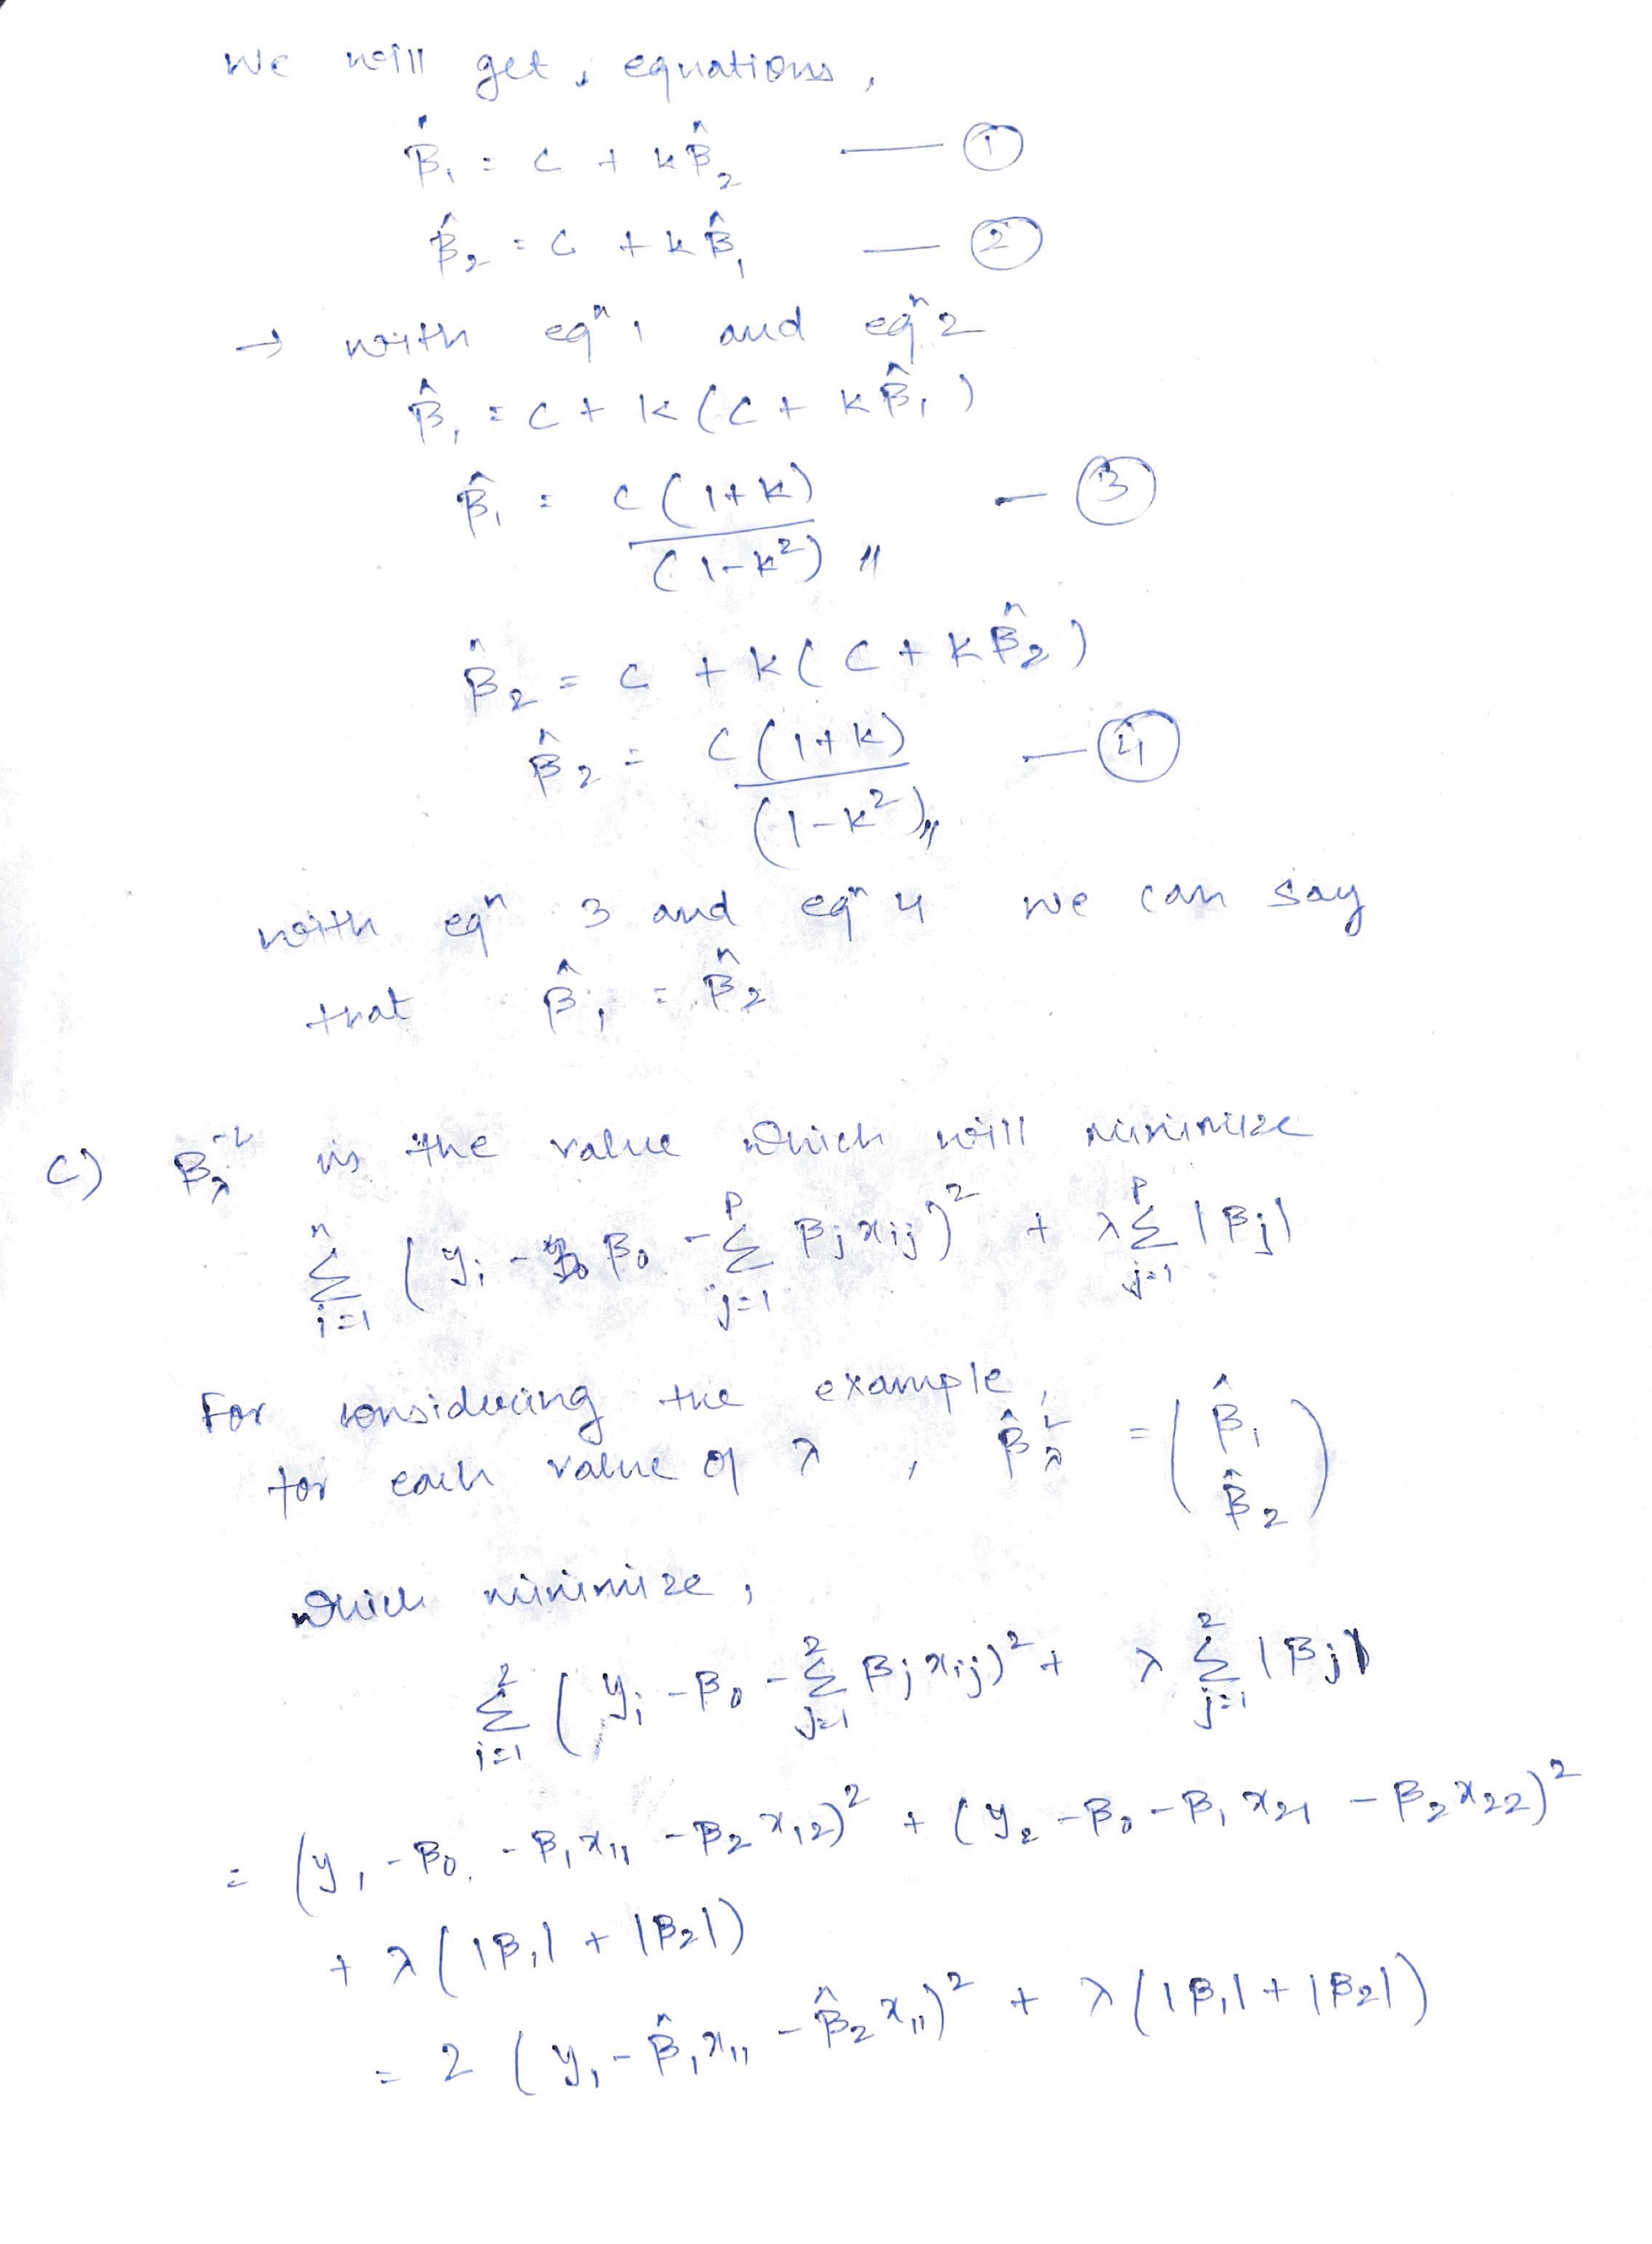

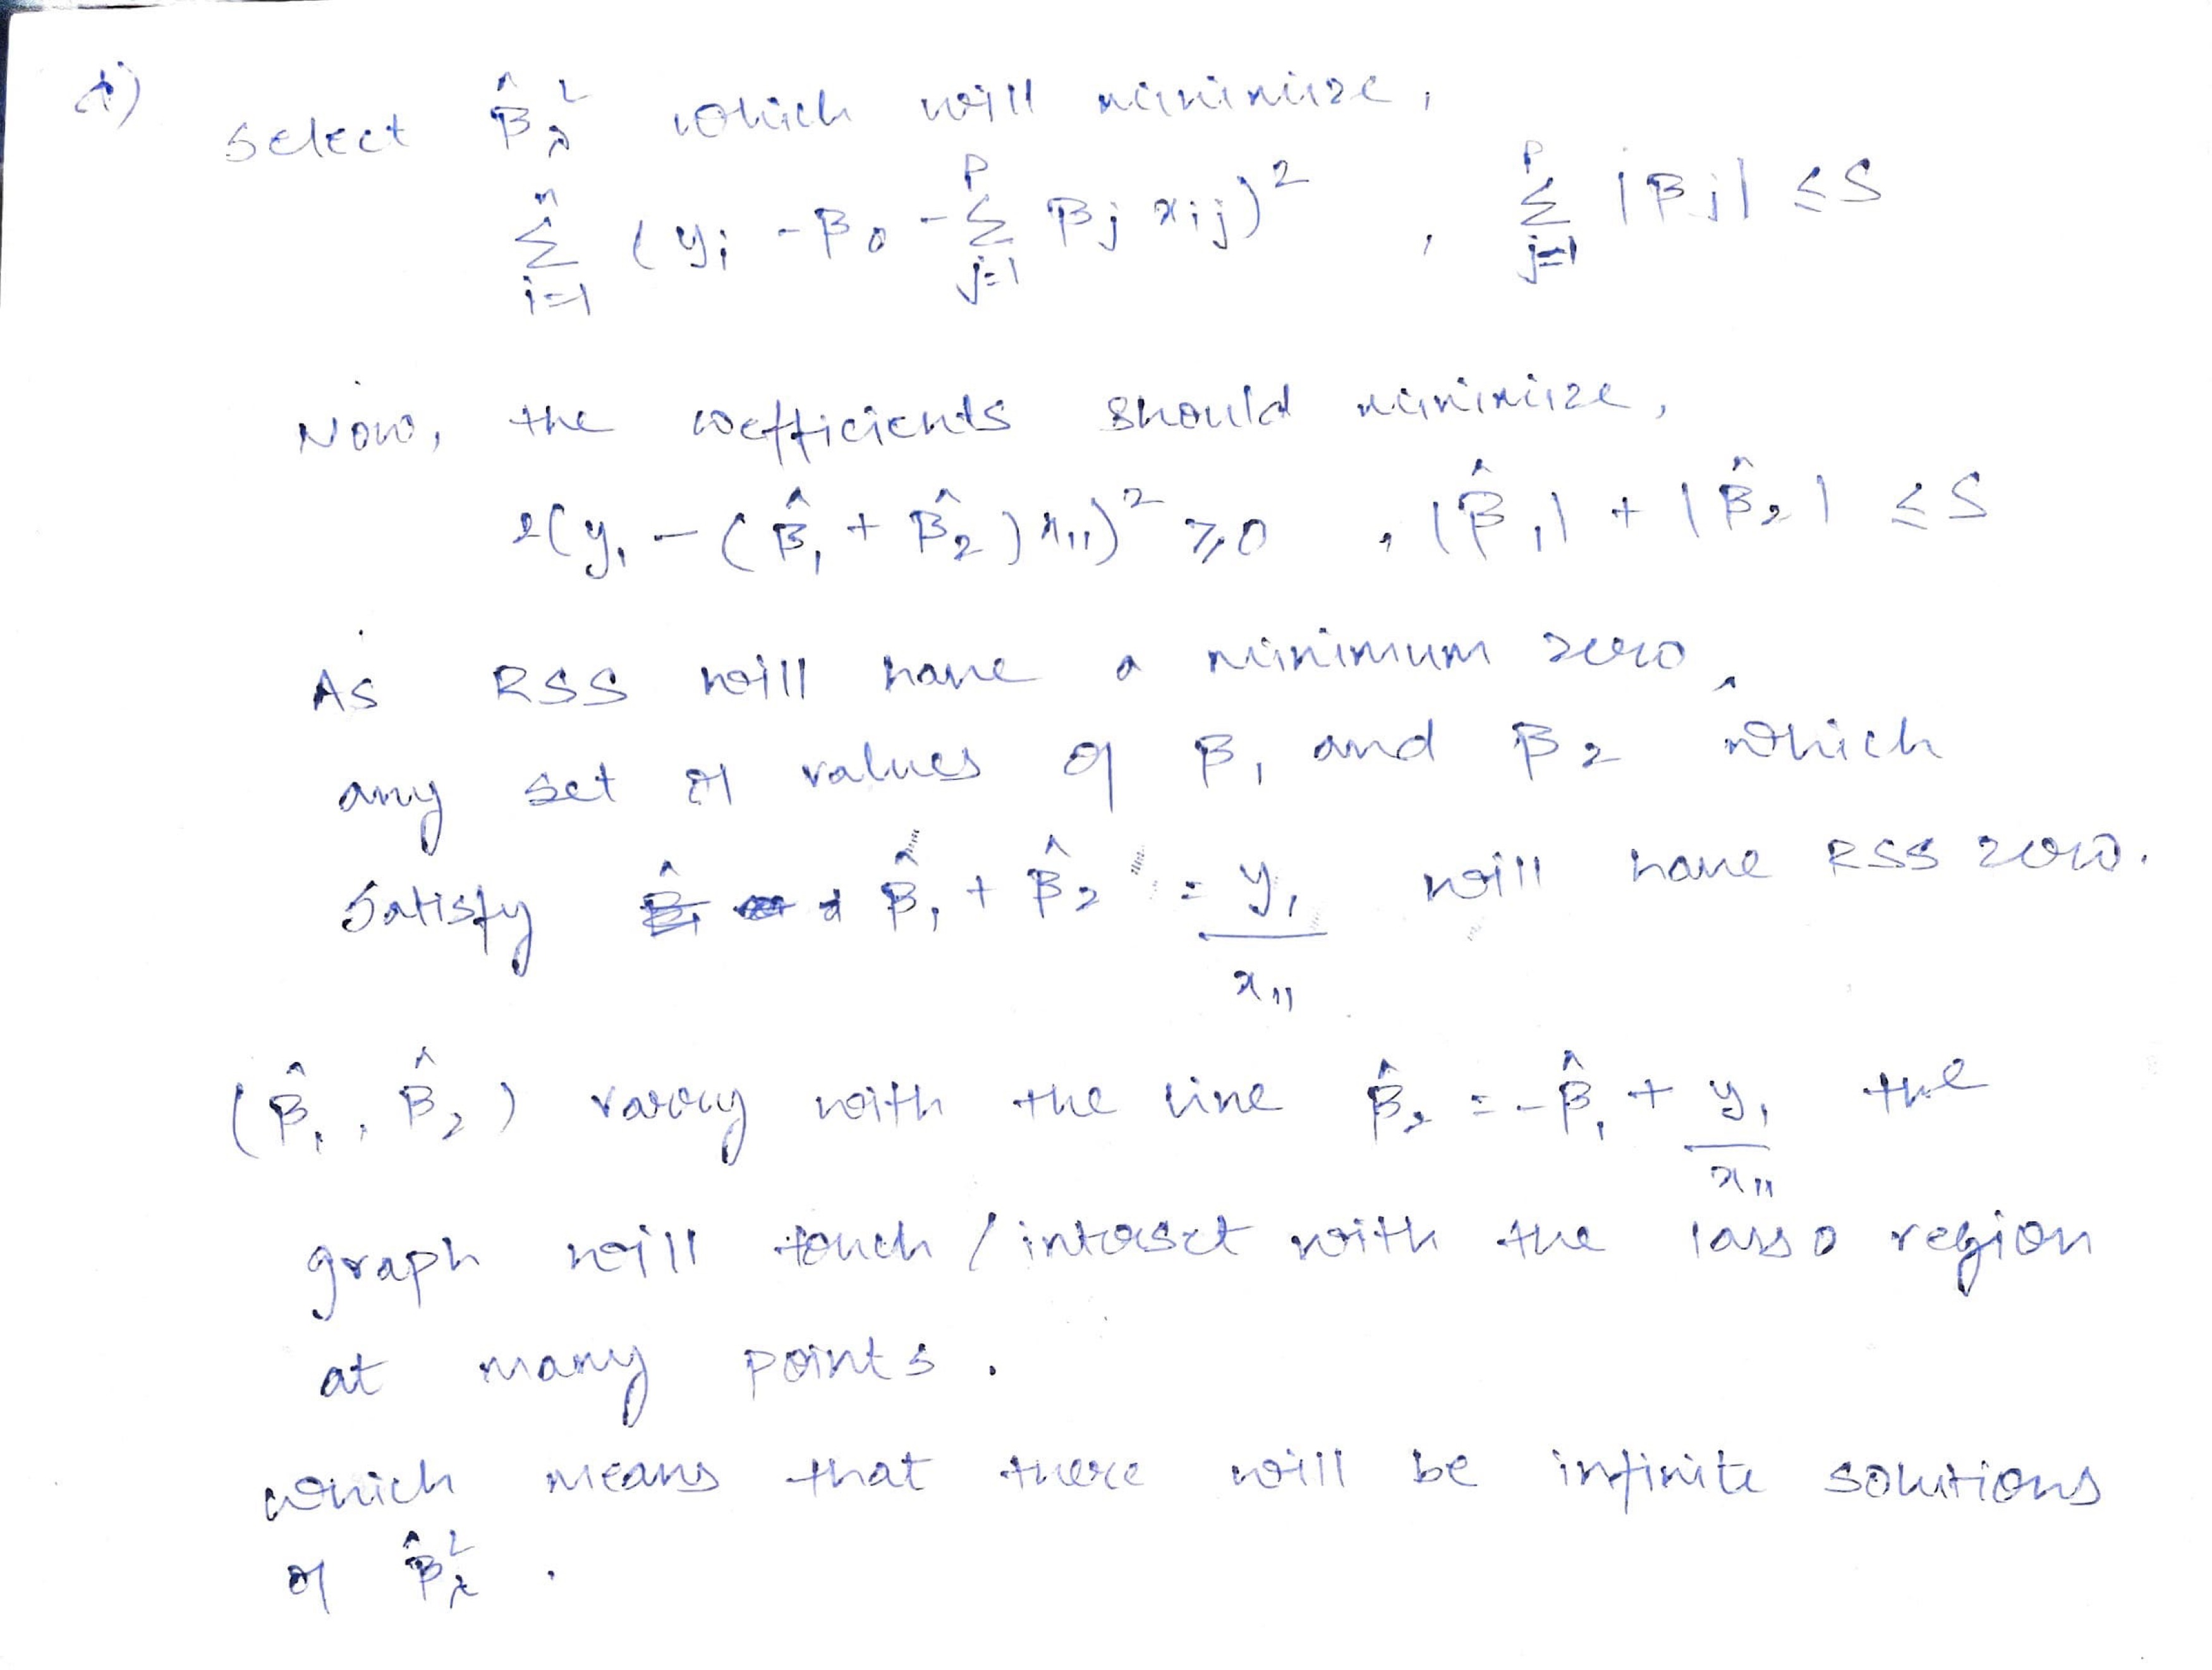

### 4. ISLR 8.4.5

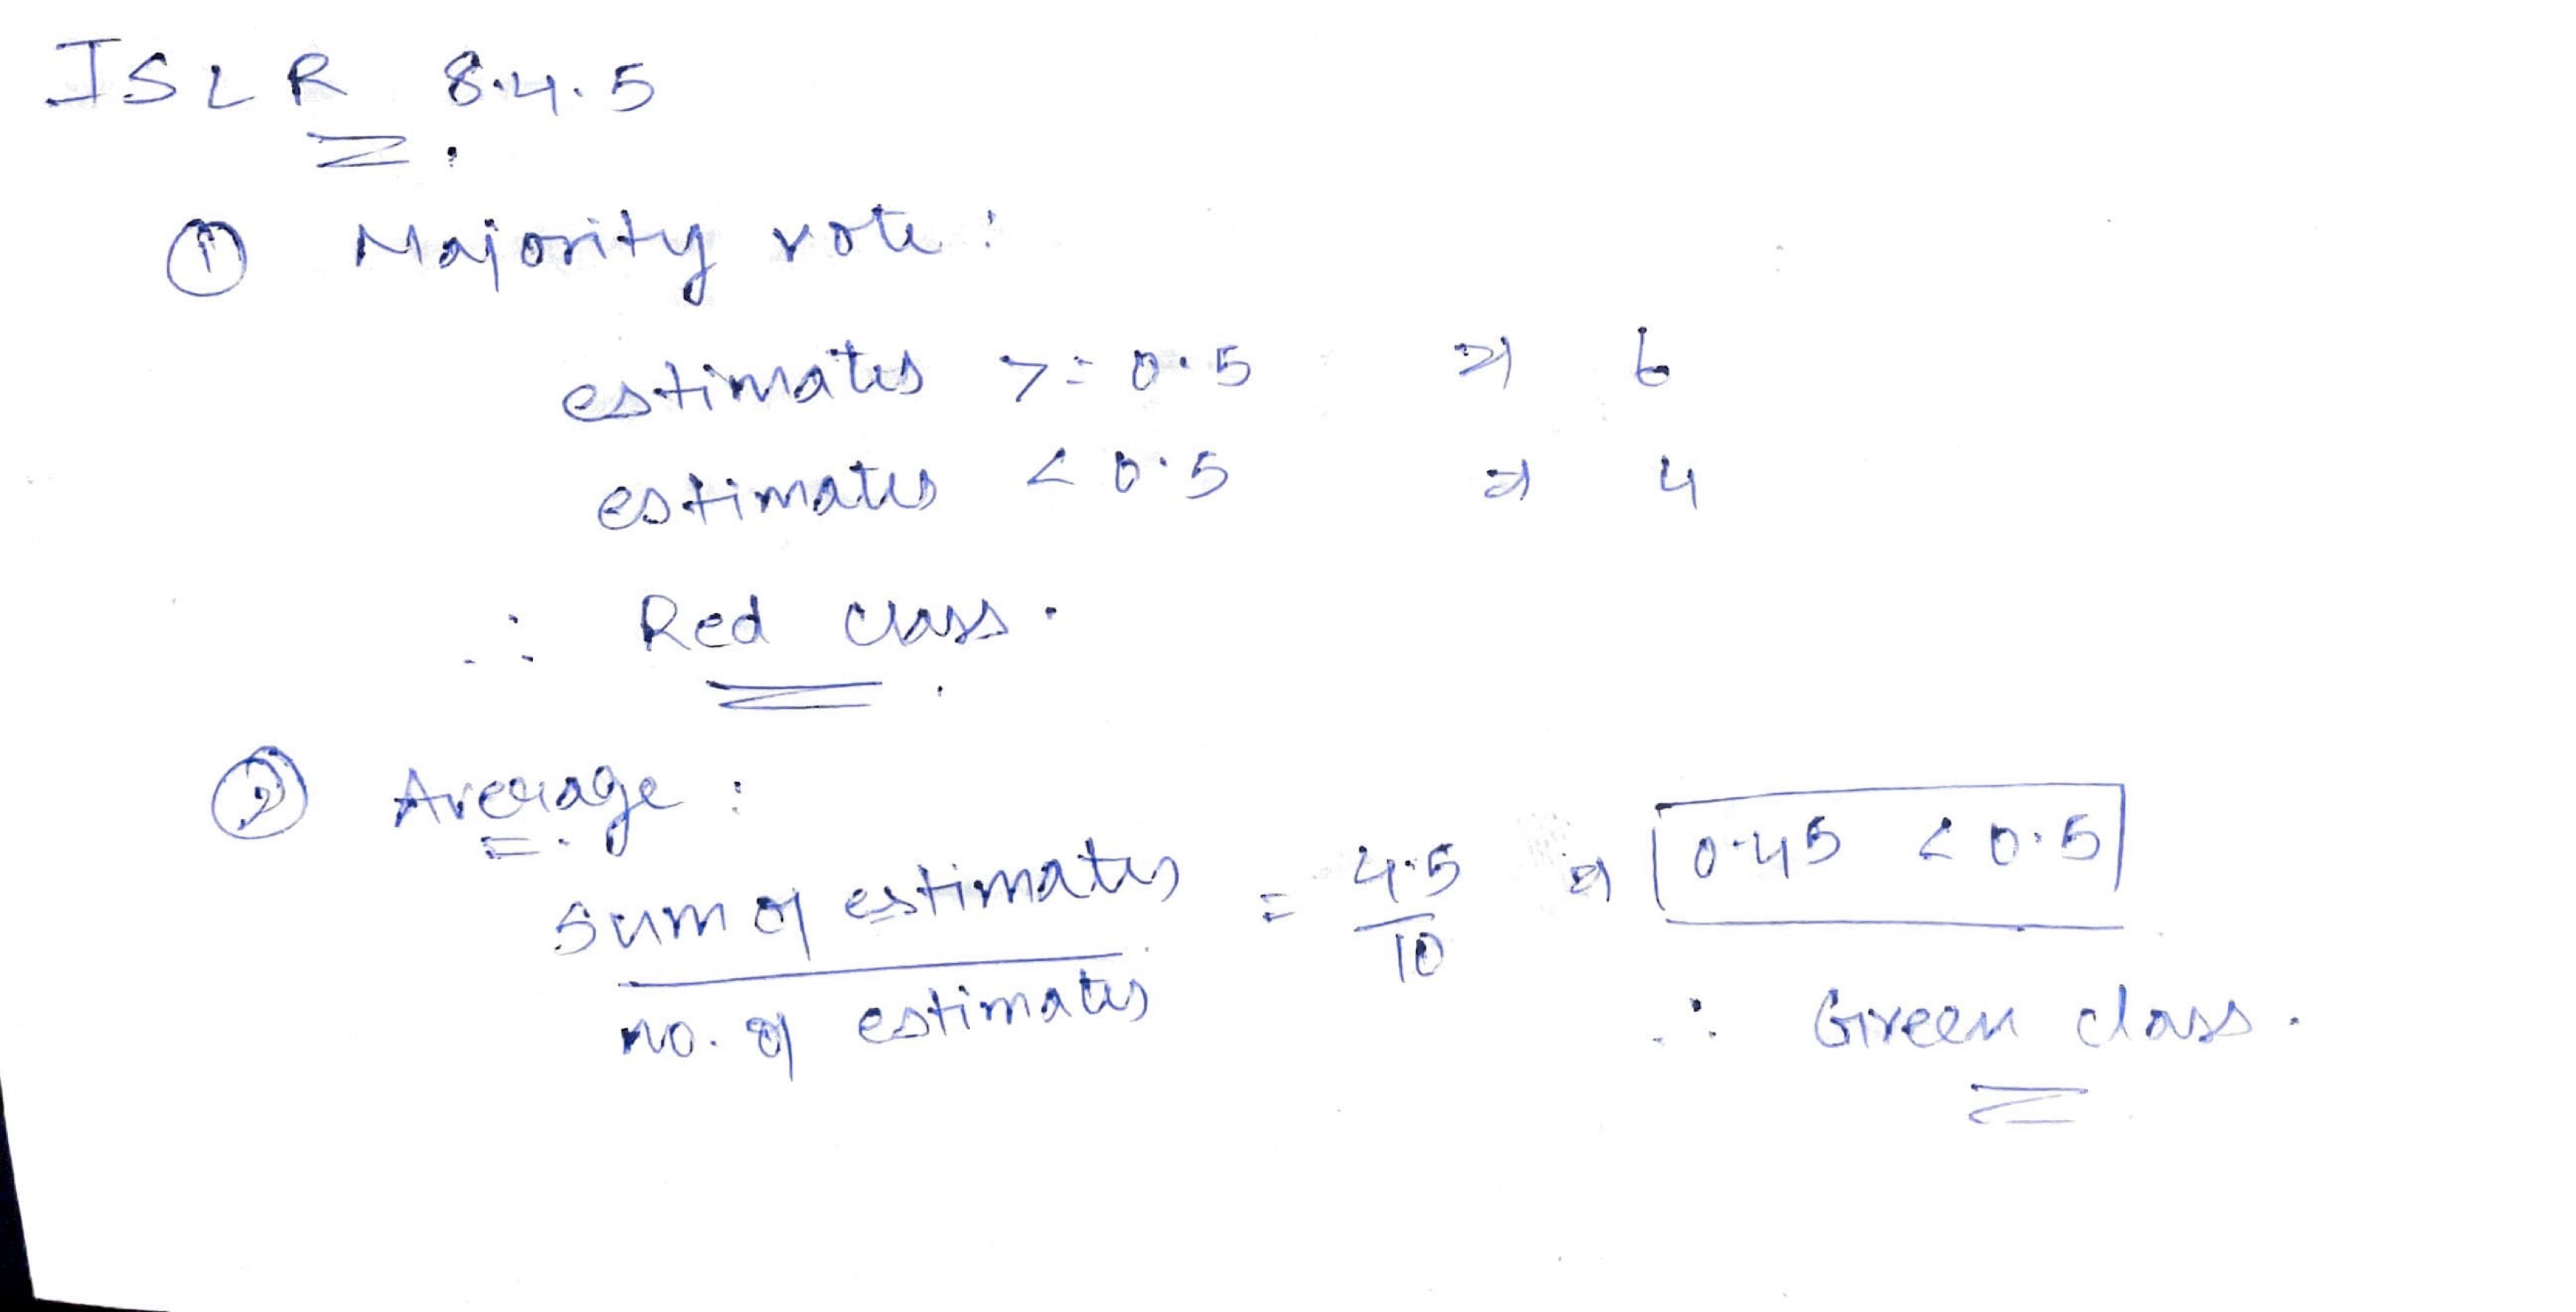

### 5. ISLR 9.7.3

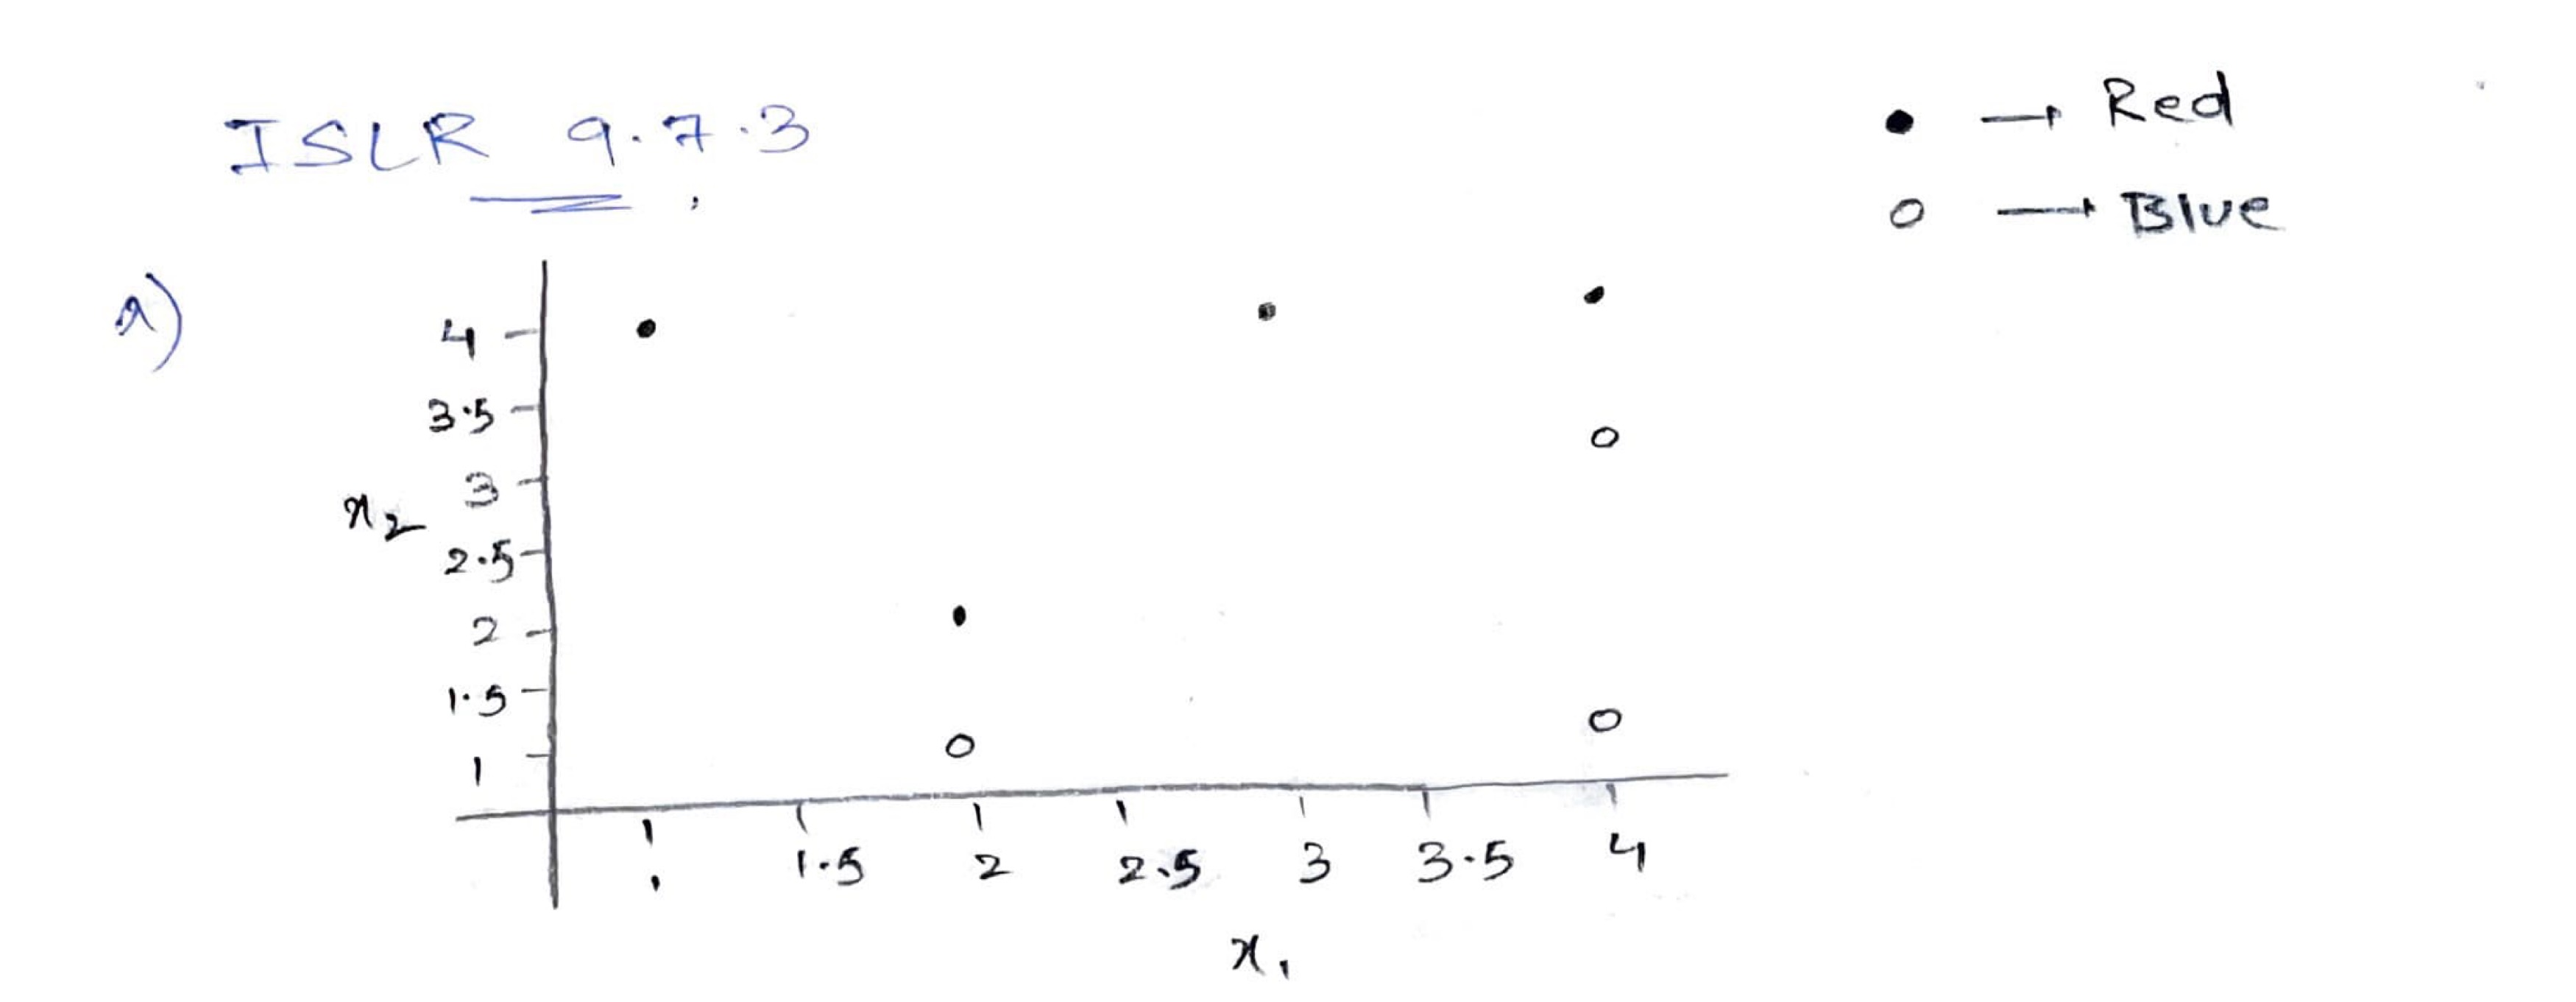

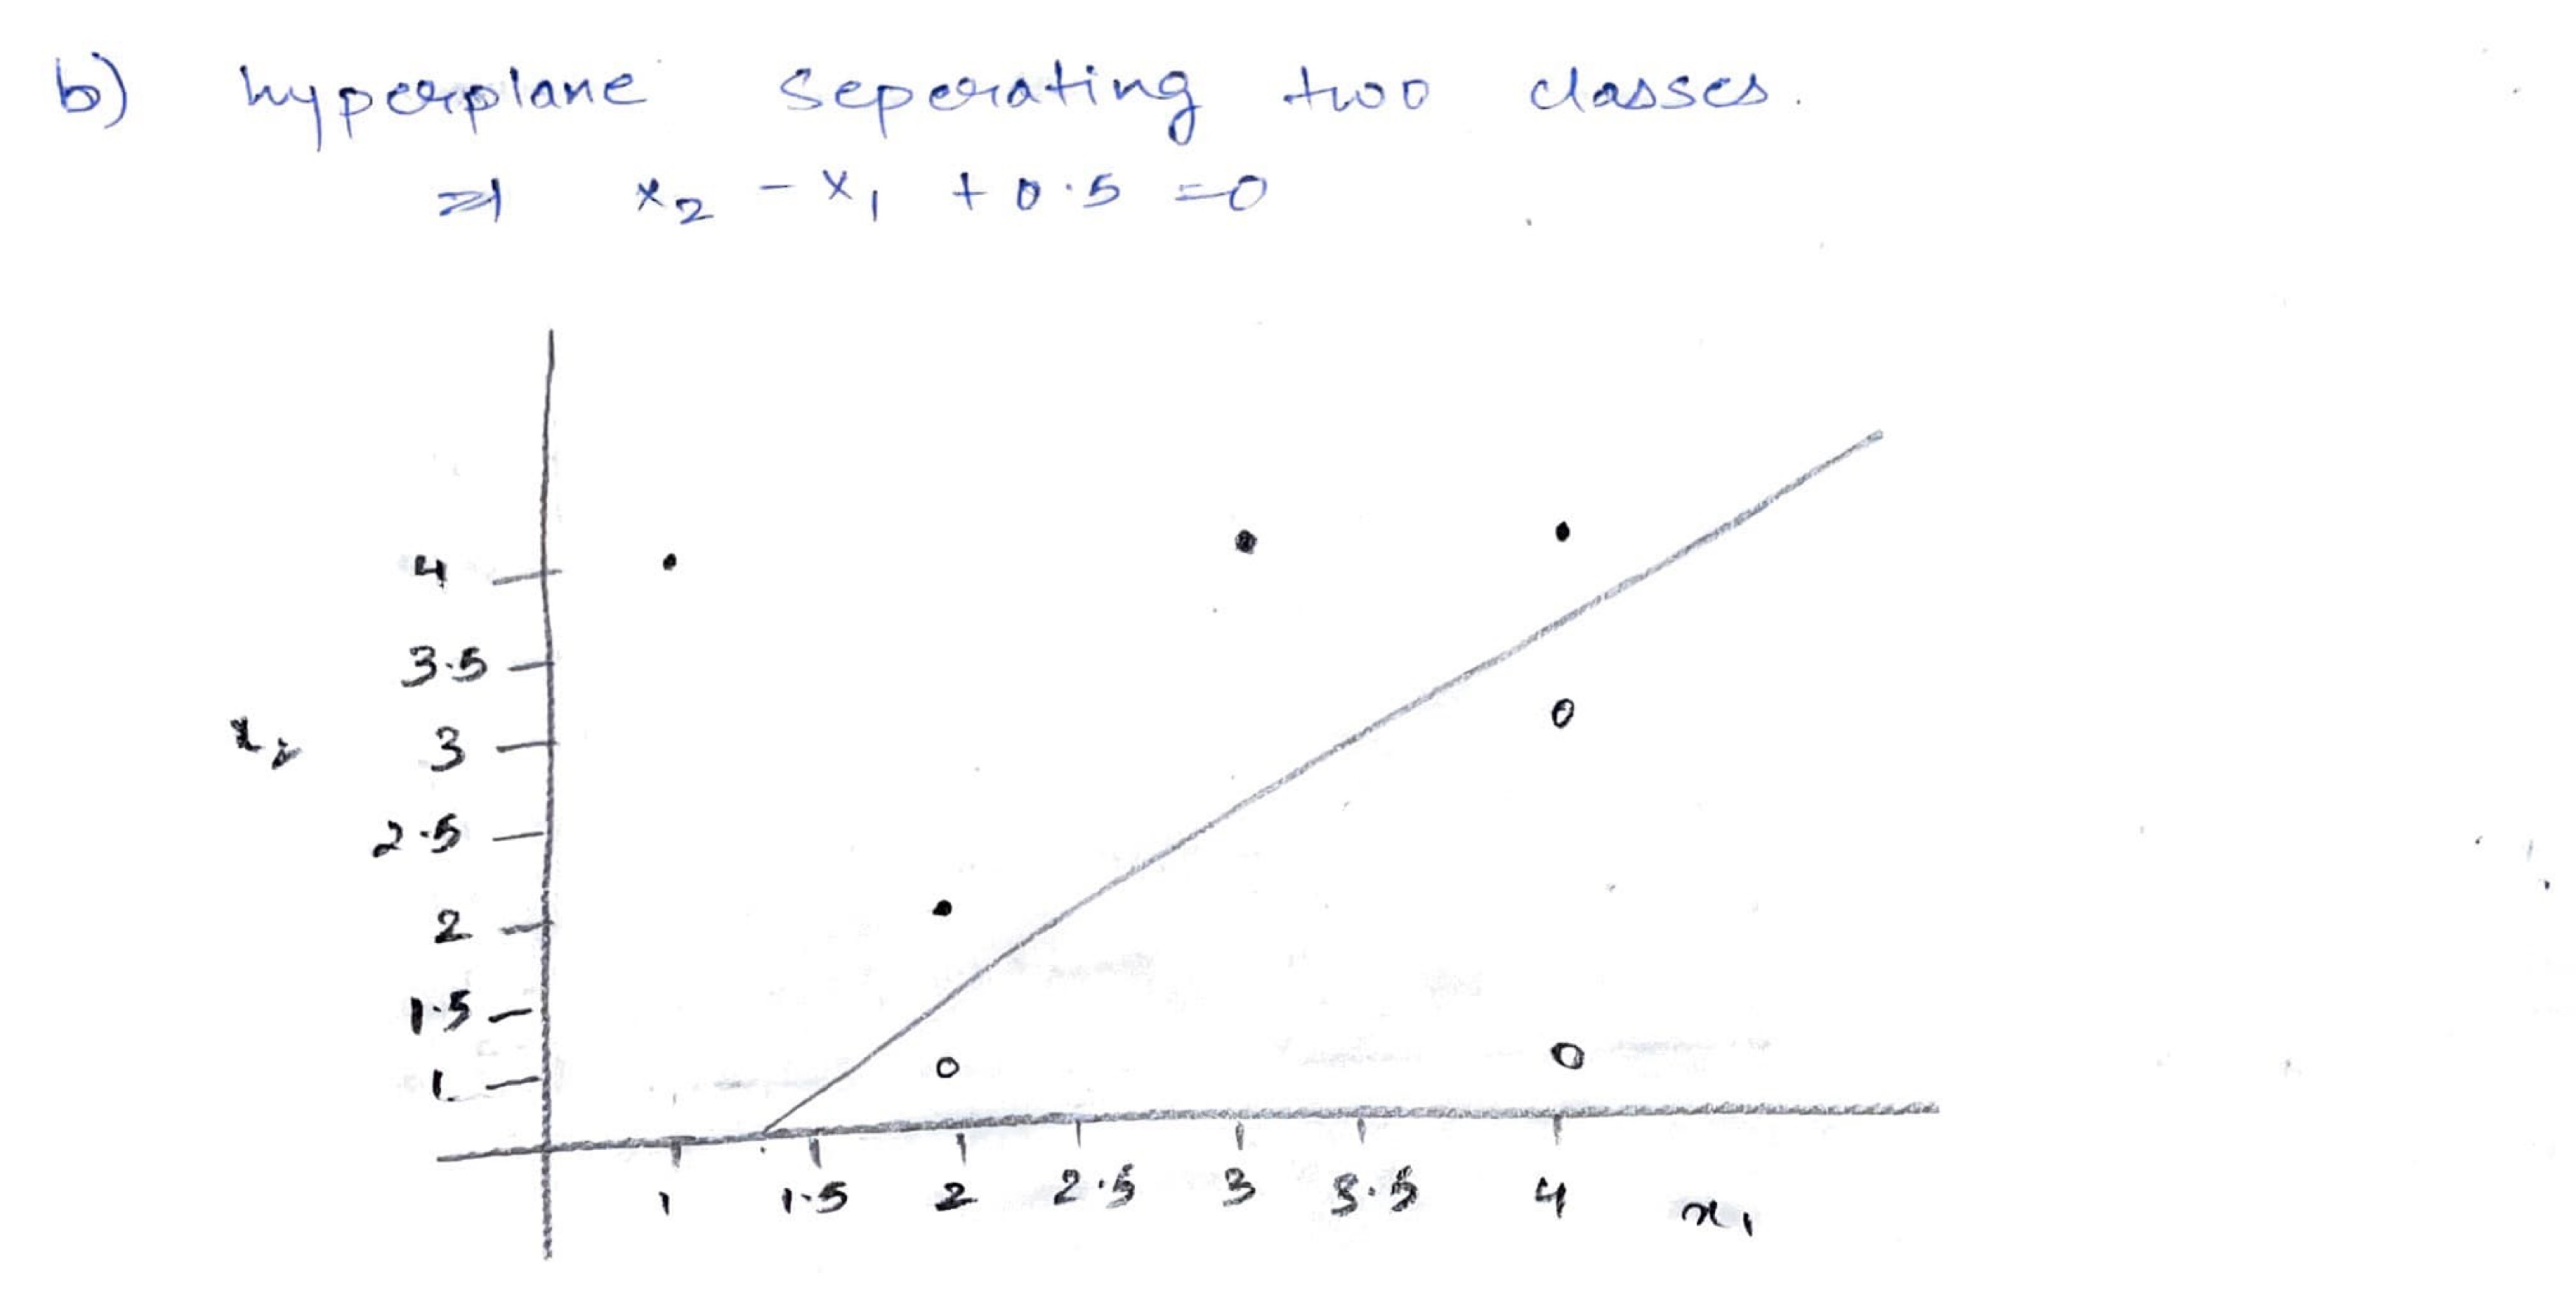

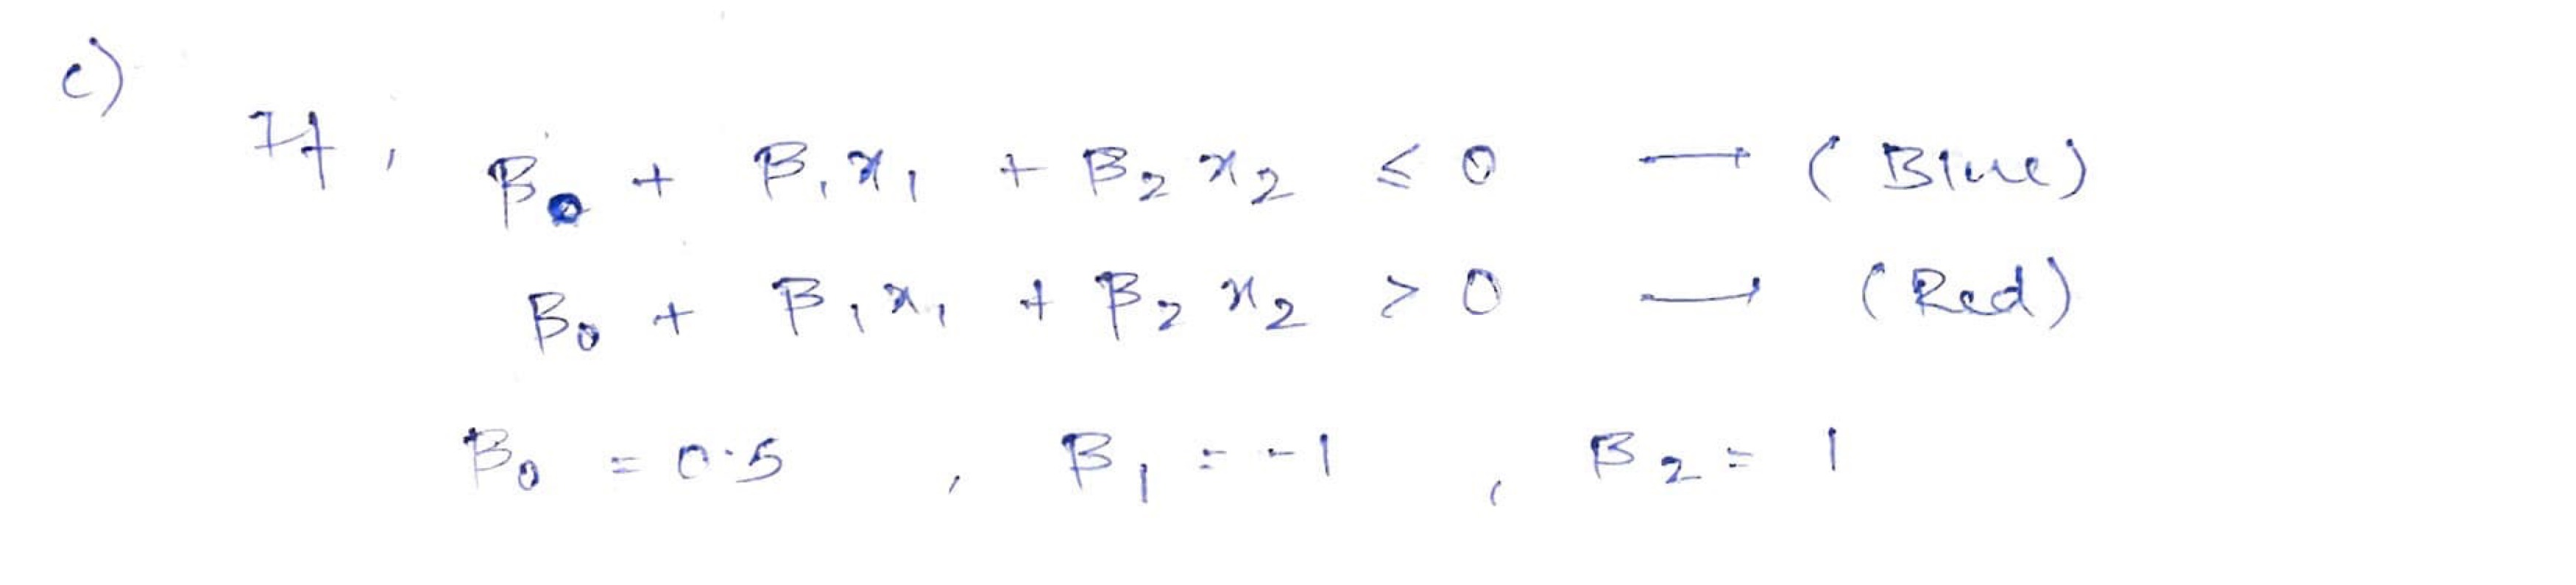

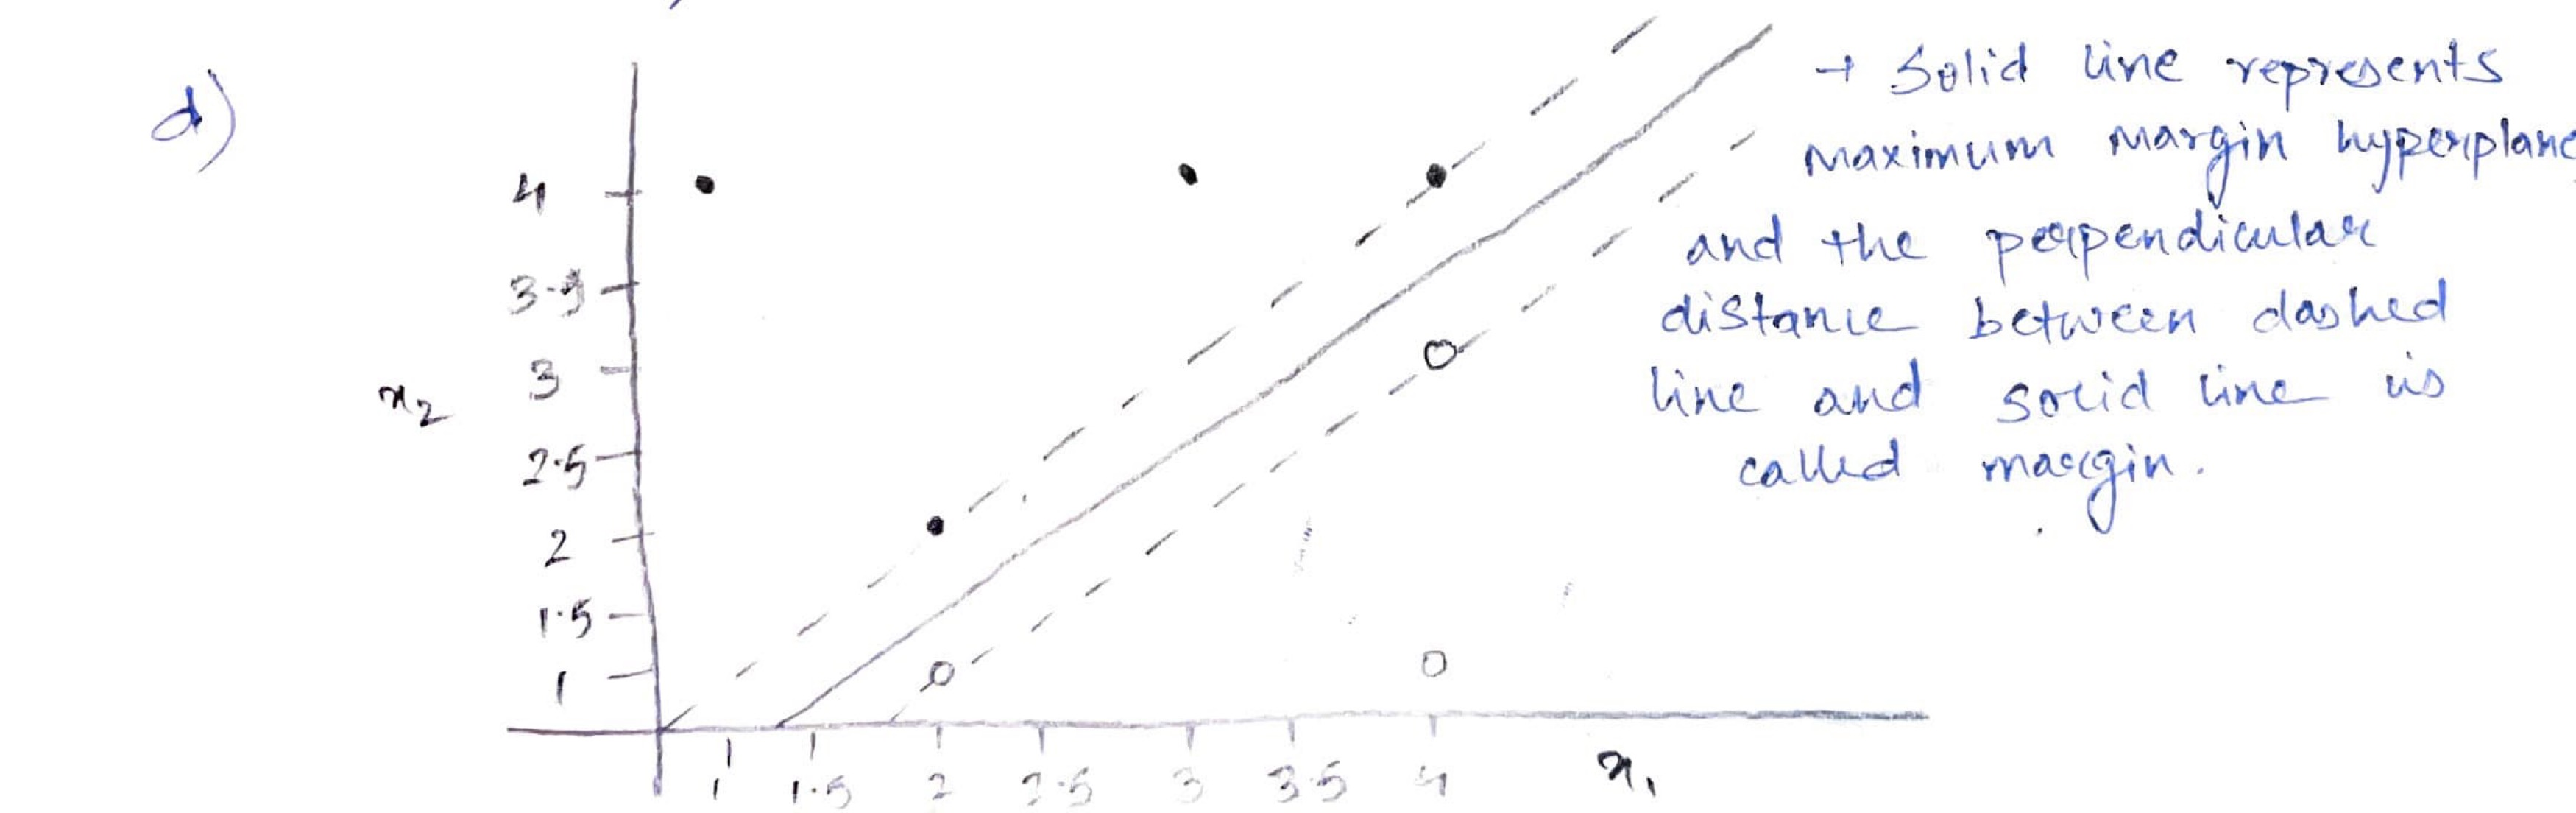

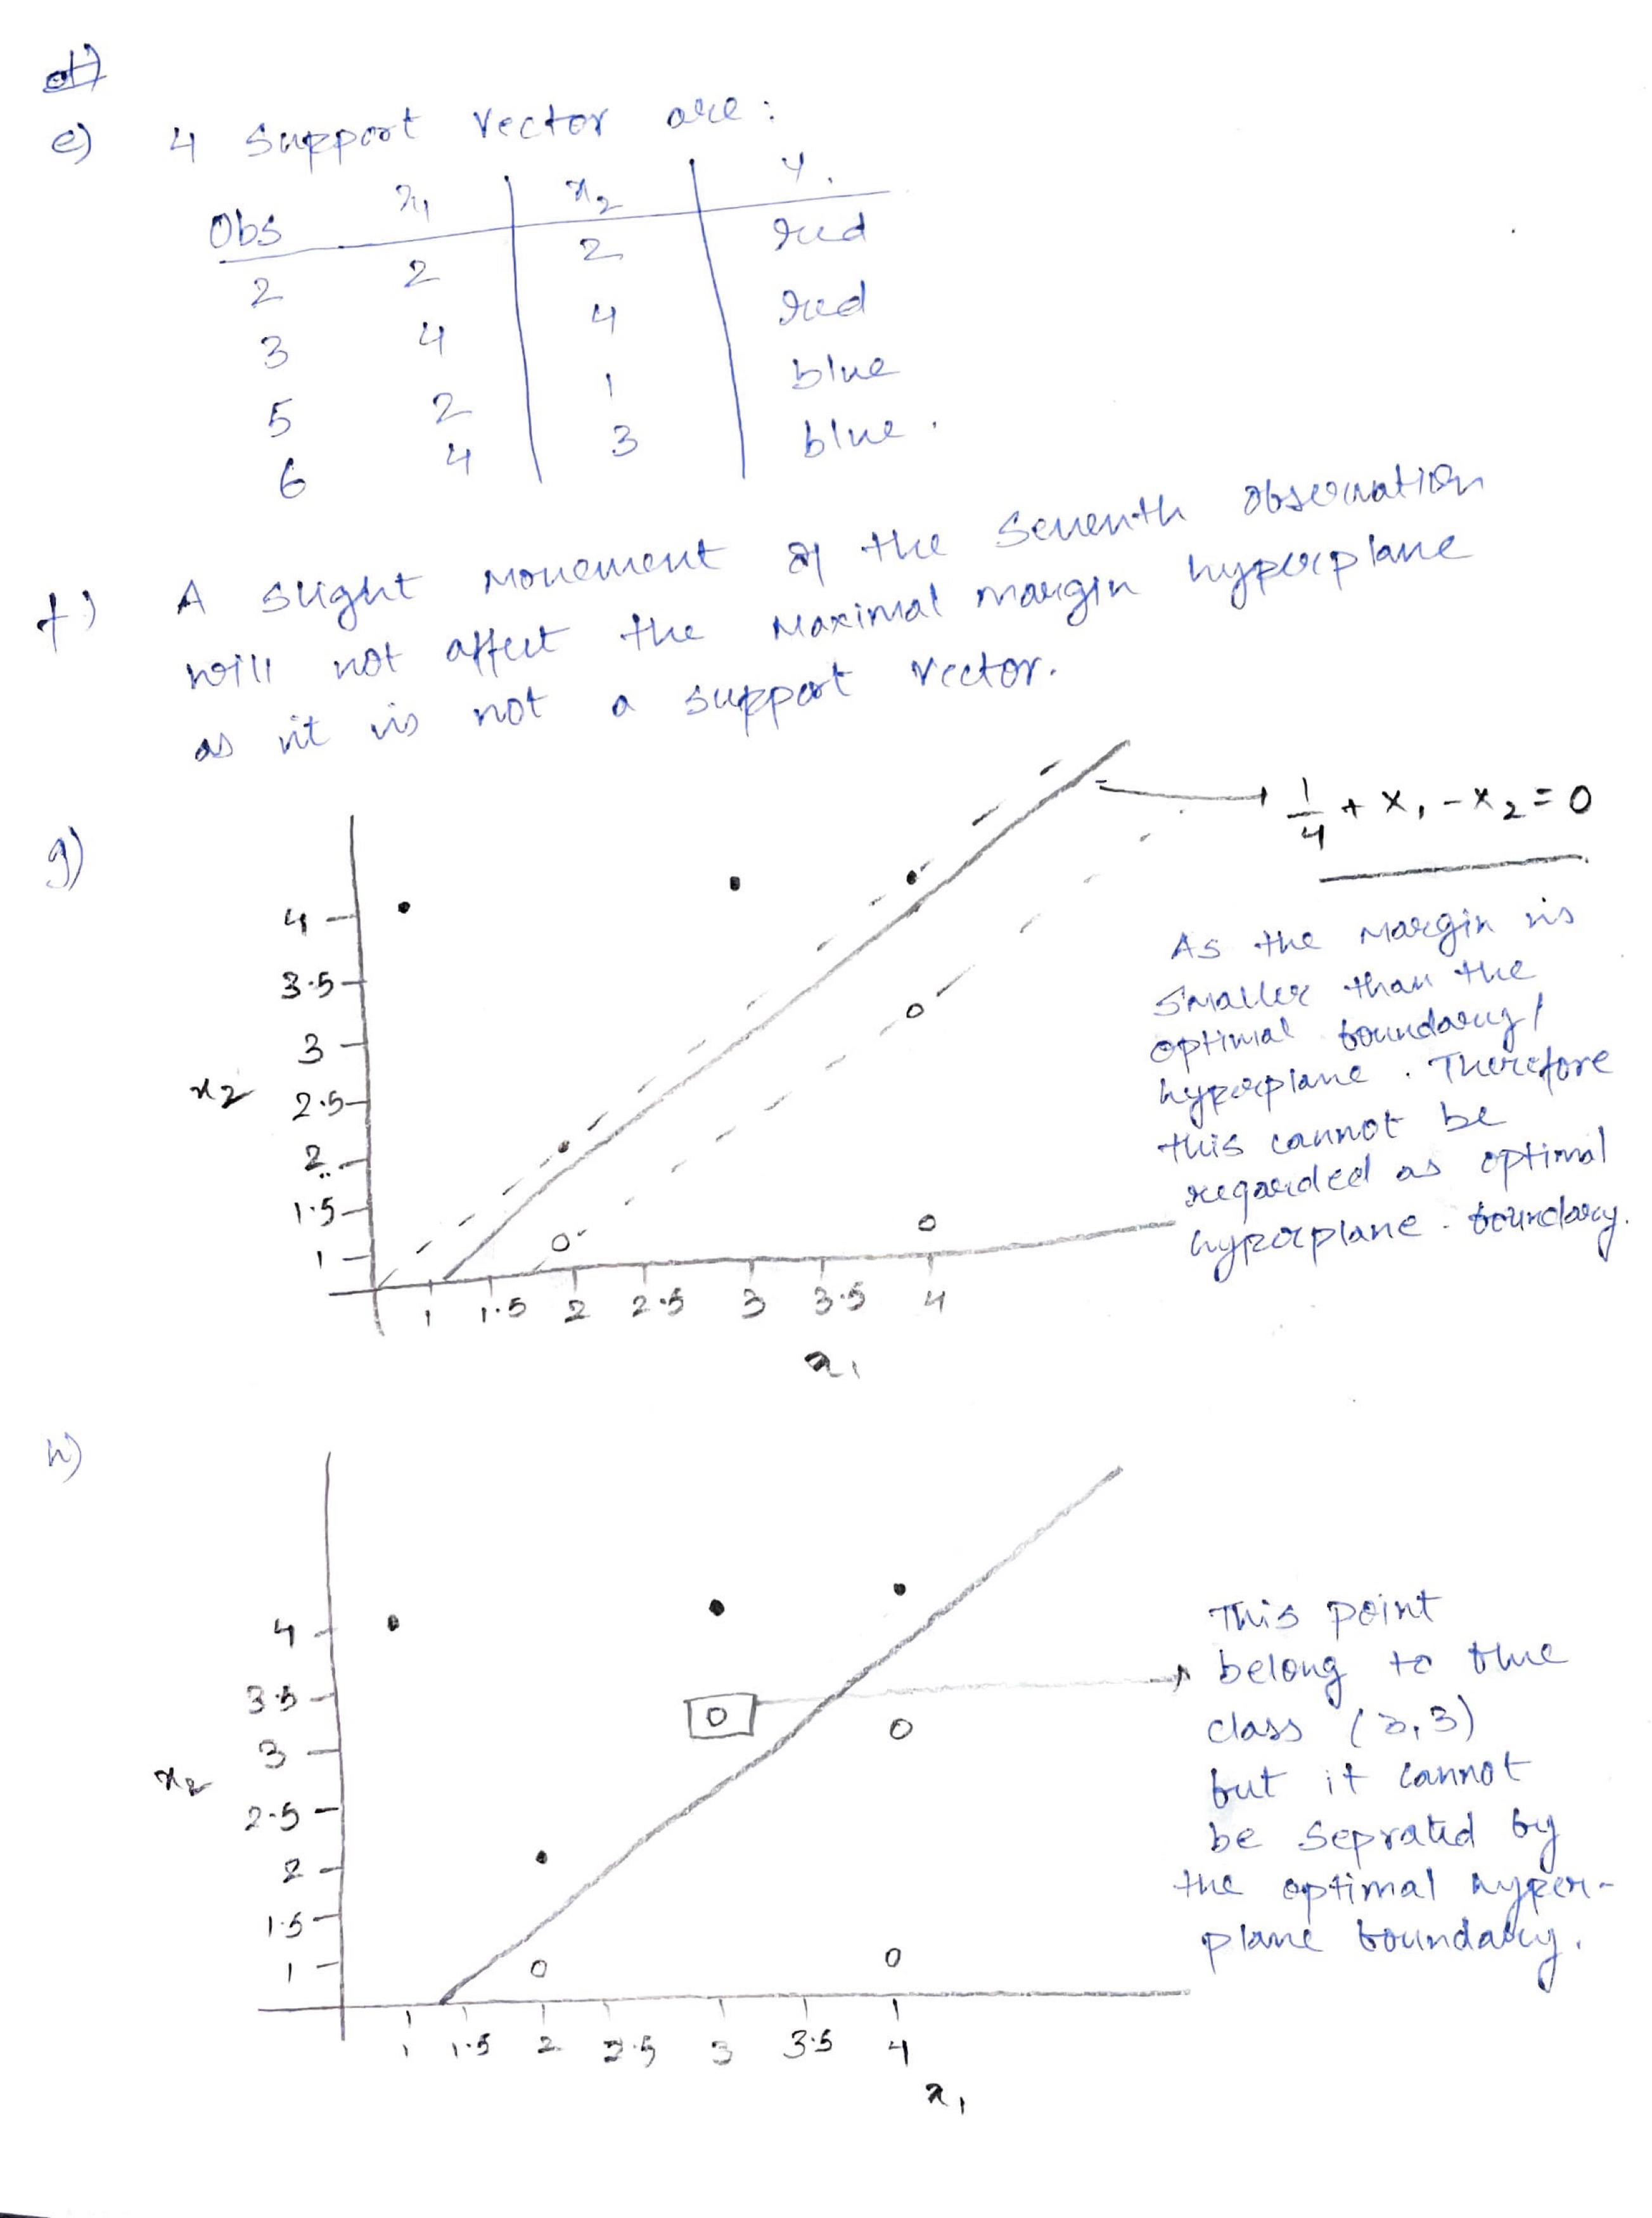